In [ ]:
#Cross Correlation Tests:
#Commodity Futures Test

In [ ]:
#Sites
#https://scicoding.com/cross-correlation-in-python-3-popular-packages/#:~:text=Cross%2Dcorrelation%20is%20a%20basic,they%20are%20the%20most%20similar.
#https://www.scicoding.com/4-ways-of-calculating-autocorrelation-in-python/
#https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9

In [50]:
#libraries
import pandas as pd
import numpy as np

In [2]:
#Import Commodity Data
cd = pd.read_csv("/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Futures_csv.csv")
cd.tail()

Date  Gold_Futures  Oil_Futures  Wheat_Futures  Nat_Gas_Futures  \
103  4/29/22   1909.300049   104.690002        1043.75            7.244   
104      NaN           NaN          NaN            NaN              NaN   
105      NaN           NaN          NaN            NaN              NaN   
106      NaN           NaN          NaN            NaN              NaN   
107      NaN           NaN          NaN            NaN              NaN   

     Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  Scale_Mean  Scale_Count  \
103   -4477.0      -0.24     18353.0    -5001.3   -0.272506      18353.0   
104       NaN        NaN         NaN        NaN         NaN          NaN   
105       NaN        NaN         NaN        NaN         NaN          NaN   
106       NaN        NaN         NaN        NaN         NaN          NaN   
107       NaN        NaN         NaN        NaN         NaN          NaN   

     ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
103  -44580.1  -2.429036     18353.0     -631663.0  
104       NaN        NaN         NaN           NaN  
105       NaN        NaN         NaN           NaN  
106       NaN        NaN         NaN           NaN  
107       NaN        NaN         NaN           NaN

In [3]:
cd2 = cd.dropna()
cd2.tail()

Date  Gold_Futures  Oil_Futures  Wheat_Futures  Nat_Gas_Futures  \
99   4/25/22   1893.199951    98.540001        1062.00            6.669   
100  4/26/22   1901.400024   101.699997        1083.25            6.850   
101  4/27/22   1885.900024   102.019997        1080.00            7.267   
102  4/28/22   1888.699951   105.360001        1074.00            6.888   
103  4/29/22   1909.300049   104.690002        1043.75            7.244   

     Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  Scale_Mean  Scale_Count  \
99    -2635.0      -0.17     15717.0   -36474.0   -2.320672      15717.0   
100   -3859.0      -0.24     15976.0   -27256.0   -1.706059      15976.0   
101   -3603.0      -0.24     14941.0   -27635.7   -1.849655      14941.0   
102   -3314.0      -0.14     23727.0    -7103.7   -0.299393      23727.0   
103   -4477.0      -0.24     18353.0    -5001.3   -0.272506      18353.0   

     ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
99   -28553.8  -1.816746     15717.0     -616410.0  
100  -42725.7  -2.674368     15976.0     -620269.0  
101  -39186.1  -2.622723     14941.0     -623872.0  
102  -36851.5  -1.553146     23727.0     -627186.0  
103  -44580.1  -2.429036     18353.0     -631663.0

In [4]:
cd2.head()

Date  Gold_Futures  Oil_Futures  Wheat_Futures  Nat_Gas_Futures  \
0  12/1/21   1781.599976    65.570000         778.50            4.258   
1  12/2/21   1760.699951    66.500000         806.50            4.056   
2  12/3/21   1782.000000    66.260002         794.50            4.132   
3  12/6/21   1777.500000    69.489998         797.00            3.657   
4  12/7/21   1782.599976    72.050003         799.25            3.708   

   Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  Scale_Mean  Scale_Count  \
0    -442.0  -0.070506      6269.0   -10732.2   -1.711948       6269.0   
1   -2584.0  -0.400000      6466.0   -17279.9   -2.672425       6466.0   
2   -2281.0  -0.310000      7257.0   -17006.9   -2.343517       7257.0   
3   -2657.0  -0.390000      6756.0   -24903.7   -3.686160       6756.0   
4   -6842.0  -0.450000     15343.0   -86243.3   -5.621019      15343.0   

   ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
0   -6551.3  -1.045031      6269.0        -442.0  
1  -24428.1  -3.777931      6466.0       -3026.0  
2  -22993.0  -3.168389      7257.0       -5307.0  
3  -25370.9  -3.755314      6756.0       -7964.0  
4  -65007.8  -4.236968     15343.0      -14806.0

In [9]:
#Gold Futures with Sent_Sum
#Numpy Correlation
#corr = np.correlate(a = cd2["Gold_Futures"], v = cd2["Sent_Cul_Sum"])
#print(corr)

In [10]:
#SciPy Test
import scipy.signal

In [84]:
sig1 = list(cd2["Gold_Futures"])
sig2 = list(cd2["Sent_Sum"])
#corr = np.correlate(a = sig1, v = sig2)

In [25]:
#corr = scipy.signal.correlate(sig1, sig2)
#corr = corr[(len(sig1) - len(sig2)-1):len(corr)-((len(sig1)-len(sig2)-1))]
#print(corr)

[-843910.621658]


In [17]:
#Normalize with Statsmodel
import statsmodels.api as sm

In [19]:
#corr = sm.tsa.stattools.ccf(sig2, sig1, adjusted = False)
#corr[0:(len(sig2)+1)][::-1]
#corr

array([-0.24231395, -0.22472823, -0.21034751, -0.19611468, -0.18264058,
       -0.14502442, -0.11202678, -0.11764286, -0.08320007, -0.05440482,
       -0.04109396, -0.0144538 ,  0.01175145,  0.04960646,  0.07836784,
        0.07683886,  0.0912686 ,  0.09546094,  0.11736561,  0.12257854,
        0.0690629 ,  0.03557857,  0.0612258 ,  0.08195262,  0.06045027,
        0.04522905,  0.07491043,  0.06589349,  0.05428046,  0.04267644,
        0.05608417,  0.08443848,  0.09238646,  0.10988804,  0.07160043,
        0.08356779,  0.10839289,  0.07277378,  0.07674525,  0.08285707,
        0.07671756,  0.08278547,  0.0866891 ,  0.1084407 ,  0.13448642,
        0.12987459,  0.12116449,  0.12813229,  0.16899145,  0.17846696,
        0.16270106,  0.16639484,  0.18590277,  0.18836559,  0.19402032,
        0.20342873,  0.19945201,  0.22428619,  0.20867086,  0.10065234,
        0.0725782 ,  0.06153496,  0.05214049,  0.03628812,  0.01510394,
        0.0030699 , -0.0067825 , -0.0112287 , -0.00575706, -0.01

In [26]:
#Normalize with numpy instead
#Demean
nsig1 = sig1 - np.mean(sig1)
nsig2 = sig2 - np.mean(sig2)
#Correlation
corr = np.correlate(a=nsig1, v = nsig2)
#Normalization
#corr = (len(sig2) * np.std(sig1) * np.std(sig2))
print(corr / (len(sig2) * np.std(sig1) * np.std(sig2)))

[-0.87200295]


In [ ]:
####################################################################################################################

In [27]:
#Autocorrelation Test
import statsmodels.api as sm
lags = range(10)
acorr = sm.tsa.acf(sig1, nlags = len(lags)-1)
acorr

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([1.        , 0.95607916, 0.9159039 , 0.88719431, 0.84899678,
       0.81221347, 0.76515295, 0.73507888, 0.71123235, 0.68957349])

In [30]:
acorr2 = sm.tsa.acf(sig2, nlags = len(lags)-1)
acorr2

array([1.        , 0.97879328, 0.95629636, 0.93293874, 0.90865314,
       0.88370292, 0.85783788, 0.83155858, 0.80469829, 0.77735166])

In [ ]:
####################################################################################################################

In [51]:
#The four types of synchrony test
#https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9
#Pearson
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [32]:
cd2.tail()

Date  Gold_Futures  Oil_Futures  Wheat_Futures  Nat_Gas_Futures  \
99   4/25/22   1893.199951    98.540001        1062.00            6.669   
100  4/26/22   1901.400024   101.699997        1083.25            6.850   
101  4/27/22   1885.900024   102.019997        1080.00            7.267   
102  4/28/22   1888.699951   105.360001        1074.00            6.888   
103  4/29/22   1909.300049   104.690002        1043.75            7.244   

     Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  Scale_Mean  Scale_Count  \
99    -2635.0      -0.17     15717.0   -36474.0   -2.320672      15717.0   
100   -3859.0      -0.24     15976.0   -27256.0   -1.706059      15976.0   
101   -3603.0      -0.24     14941.0   -27635.7   -1.849655      14941.0   
102   -3314.0      -0.14     23727.0    -7103.7   -0.299393      23727.0   
103   -4477.0      -0.24     18353.0    -5001.3   -0.272506      18353.0   

     ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
99   -28553.8  -1.816746     15717.0     -616410.0  
100  -42725.7  -2.674368     15976.0     -620269.0  
101  -39186.1  -2.622723     14941.0     -623872.0  
102  -36851.5  -1.553146     23727.0     -627186.0  
103  -44580.1  -2.429036     18353.0     -631663.0

In [85]:
#sig1
#sig2
gold_test = pd.DataFrame({"Gold_Future": sig1, "Sent_Sum": sig2})

In [86]:
gold_test

Gold_Future  Sent_Sum
0    1781.599976    -442.0
1    1760.699951   -2584.0
2    1782.000000   -2281.0
3    1777.500000   -2657.0
4    1782.599976   -6842.0
..           ...       ...
99   1893.199951   -2635.0
100  1901.400024   -3859.0
101  1885.900024   -3603.0
102  1888.699951   -3314.0
103  1909.300049   -4477.0

[104 rows x 2 columns]

In [87]:
#Pearson 
overall_pearson_r = gold_test.corr().iloc[0,1]
overall_pearson_r

-0.24231395323326602

In [88]:
r, p = stats.pearsonr(gold_test.dropna()["Gold_Future"], gold_test.dropna()["Sent_Sum"])

In [89]:
r

-0.24231395323326615

In [90]:
p

0.013200523192804615

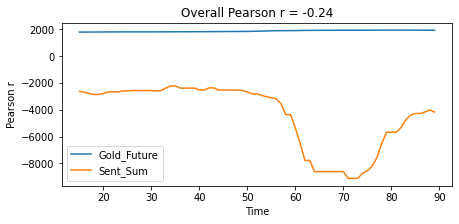

In [91]:
# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
gold_test.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

In [ ]:
####################################################################################################################

In [ ]:
#Time Lagged Cross Correlation — assessing signal dynamics

In [43]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [92]:
d1 = gold_test["Sent_Sum"]
d2 = gold_test["Gold_Future"]
days = 9
fps = 10
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days*fps),int(days*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


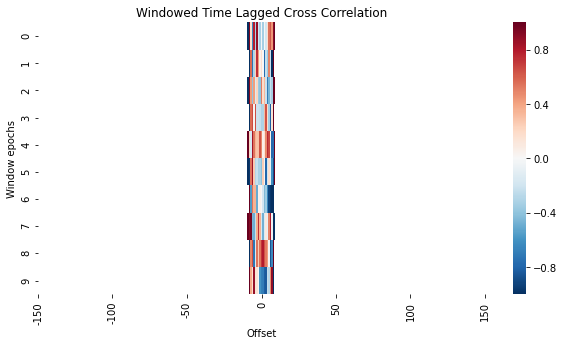

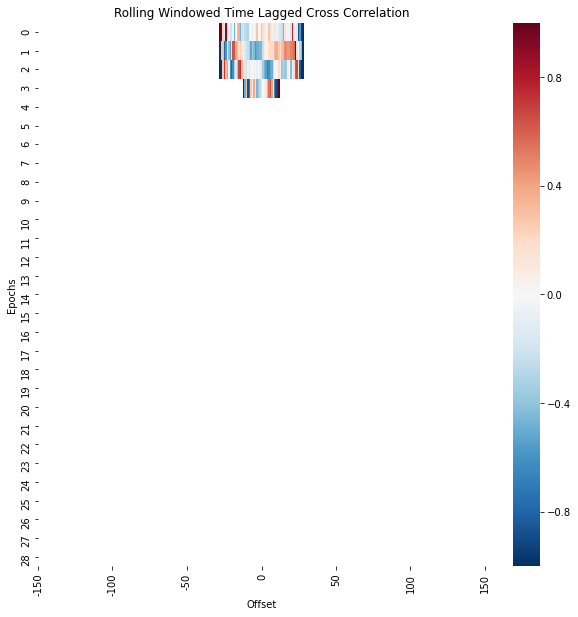

In [93]:
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 10
samples_per_split = gold_test.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = gold_test["Gold_Future"].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = gold_test["Sent_Sum"].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 30 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 900:
    d1 = gold_test["Gold_Future"].iloc[t_start:t_end]
    d2 = gold_test["Sent_Sum"].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

In [ ]:
####################################################################################################################

In [5]:
#Link
#https://campus.datacamp.com/courses/visualizing-time-series-data-in-python/work-with-multiple-time-series?ex=9
import scipy

In [6]:
sig1 = list(cd2["Gold_Futures"])
sig2 = list(cd2["Sent_Sum"])
gold_test = pd.DataFrame({"Gold_Future": sig1, "Sent_Sum": sig2})
gold_test

Gold_Future  Sent_Sum
0    1781.599976    -442.0
1    1760.699951   -2584.0
2    1782.000000   -2281.0
3    1777.500000   -2657.0
4    1782.599976   -6842.0
..           ...       ...
99   1893.199951   -2635.0
100  1901.400024   -3859.0
101  1885.900024   -3603.0
102  1888.699951   -3314.0
103  1909.300049   -4477.0

[104 rows x 2 columns]

In [7]:
#For Linear 
from scipy.stats.stats import pearsonr
#For NonLinear
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

In [8]:
pearsonr(sig1, sig2)

(-0.24231395323326615, 0.013200523192804615)

In [9]:
spearmanr(sig1, sig2)

SpearmanrResult(correlation=-0.42816295830630713, pvalue=5.78832468068231e-06)

In [10]:
kendalltau(sig1, sig2)

KendalltauResult(correlation=-0.2830999115654962, pvalue=2.0619035019306133e-05)

In [11]:
#Correlation Matrix with Spearman
corr_s = cd2.corr(method = "spearman")
corr_s

Gold_Futures  Oil_Futures  Wheat_Futures  Nat_Gas_Futures  \
Gold_Futures         1.000000     0.909930       0.819223         0.703121   
Oil_Futures          0.909930     1.000000       0.786281         0.781428   
Wheat_Futures        0.819223     0.786281       1.000000         0.624570   
Nat_Gas_Futures      0.703121     0.781428       0.624570         1.000000   
Sent_Sum            -0.428163    -0.456304      -0.478480        -0.290727   
Sent_Mean            0.283419     0.284804       0.200532         0.308996   
Sent_Count           0.816558     0.840400       0.771270         0.615955   
Scale_Sum           -0.672816    -0.654568      -0.590039        -0.357615   
Scale_Mean          -0.308556    -0.308339      -0.211777        -0.009698   
Scale_Count          0.816558     0.840400       0.771270         0.615955   
ScSe_Sum            -0.476710    -0.510292      -0.519084        -0.338875   
ScSe_Mean            0.218180     0.214276       0.138859         0.253261   
ScSe_Count           0.816558     0.840400       0.771270         0.615955   
Sent_Cul_Sum        -0.857196    -0.892347      -0.736142        -0.895313   

                 Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  Scale_Mean  \
Gold_Futures    -0.428163   0.283419    0.816558  -0.672816   -0.308556   
Oil_Futures     -0.456304   0.284804    0.840400  -0.654568   -0.308339   
Wheat_Futures   -0.478480   0.200532    0.771270  -0.590039   -0.211777   
Nat_Gas_Futures -0.290727   0.308996    0.615955  -0.357615   -0.009698   
Sent_Sum         1.000000   0.491785   -0.591500   0.558501    0.402333   
Sent_Mean        0.491785   1.000000    0.275664  -0.136634    0.049384   
Sent_Count      -0.591500   0.275664    1.000000  -0.822650   -0.441353   
Scale_Sum        0.558501  -0.136634   -0.822650   1.000000    0.830225   
Scale_Mean       0.402333   0.049384   -0.441353   0.830225    1.000000   
Scale_Count     -0.591500   0.275664    1.000000  -0.822650   -0.441353   
ScSe_Sum         0.983788   0.427044   -0.638163   0.595242    0.415417   
ScSe_Mean        0.551598   0.981232    0.192276  -0.050016    0.126598   
ScSe_Count      -0.591500   0.275664    1.000000  -0.822650   -0.441353   
Sent_Cul_Sum     0.360548  -0.369126   -0.746314   0.498400    0.117977   

                 Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
Gold_Futures        0.816558 -0.476710   0.218180    0.816558     -0.857196  
Oil_Futures         0.840400 -0.510292   0.214276    0.840400     -0.892347  
Wheat_Futures       0.771270 -0.519084   0.138859    0.771270     -0.736142  
Nat_Gas_Futures     0.615955 -0.338875   0.253261    0.615955     -0.895313  
Sent_Sum           -0.591500  0.983788   0.551598   -0.591500      0.360548  
Sent_Mean           0.275664  0.427044   0.981232    0.275664     -0.369126  
Sent_Count          1.000000 -0.638163   0.192276    1.000000     -0.746314  
Scale_Sum          -0.822650  0.595242  -0.050016   -0.822650      0.498400  
Scale_Mean         -0.441353  0.415417   0.126598   -0.441353      0.117977  
Scale_Count         1.000000 -0.638163   0.192276    1.000000     -0.746314  
ScSe_Sum           -0.638163  1.000000   0.506849   -0.638163      0.415811  
ScSe_Mean           0.192276  0.506849   1.000000    0.192276     -0.303073  
ScSe_Count          1.000000 -0.638163   0.192276    1.000000     -0.746314  
Sent_Cul_Sum       -0.746314  0.415811  -0.303073   -0.746314      1.000000

In [12]:
#Correlation Matrix with Spearman
corr_k = cd2.corr(method = "kendall")
corr_k

Gold_Futures  Oil_Futures  Wheat_Futures  Nat_Gas_Futures  \
Gold_Futures         1.000000     0.735879       0.610873         0.507797   
Oil_Futures          0.735879     1.000000       0.573751         0.568547   
Wheat_Futures        0.610873     0.573751       1.000000         0.429225   
Nat_Gas_Futures      0.507797     0.568547       0.429225         1.000000   
Sent_Sum            -0.283100    -0.307965      -0.320254        -0.172784   
Sent_Mean            0.205476     0.204930       0.141085         0.212888   
Sent_Count           0.592606     0.630940       0.538016         0.381922   
Scale_Sum           -0.461165    -0.459901      -0.399029        -0.215333   
Scale_Mean          -0.201643    -0.207824      -0.137867         0.000934   
Scale_Count          0.592606     0.630940       0.538016         0.381922   
ScSe_Sum            -0.324869    -0.350481      -0.357930        -0.201886   
ScSe_Mean            0.166169     0.160022       0.102746         0.168643   
ScSe_Count           0.592606     0.630940       0.538016         0.381922   
Sent_Cul_Sum        -0.669156    -0.740360      -0.484962        -0.737137   

                 Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  Scale_Mean  \
Gold_Futures    -0.283100   0.205476    0.592606  -0.461165   -0.201643   
Oil_Futures     -0.307965   0.204930    0.630940  -0.459901   -0.207824   
Wheat_Futures   -0.320254   0.141085    0.538016  -0.399029   -0.137867   
Nat_Gas_Futures -0.172784   0.212888    0.381922  -0.215333    0.000934   
Sent_Sum         1.000000   0.354465   -0.455275   0.420915    0.281232   
Sent_Mean        0.354465   1.000000    0.195296  -0.093124    0.031293   
Sent_Count      -0.455275   0.195296    1.000000  -0.663928   -0.315534   
Scale_Sum        0.420915  -0.093124   -0.663928   1.000000    0.651606   
Scale_Mean       0.281232   0.031293   -0.315534   0.651606    1.000000   
Scale_Count     -0.455275   0.195296    1.000000  -0.663928   -0.315534   
ScSe_Sum         0.913165   0.301993   -0.501494   0.457431    0.294996   
ScSe_Mean        0.396265   0.896931    0.141150  -0.037341    0.075803   
ScSe_Count      -0.455275   0.195296    1.000000  -0.663928   -0.315534   
Sent_Cul_Sum     0.198693  -0.254489   -0.470127   0.296117    0.070202   

                 Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
Gold_Futures        0.592606 -0.324869   0.166169    0.592606     -0.669156  
Oil_Futures         0.630940 -0.350481   0.160022    0.630940     -0.740360  
Wheat_Futures       0.538016 -0.357930   0.102746    0.538016     -0.484962  
Nat_Gas_Futures     0.381922 -0.201886   0.168643    0.381922     -0.737137  
Sent_Sum           -0.455275  0.913165   0.396265   -0.455275      0.198693  
Sent_Mean           0.195296  0.301993   0.896931    0.195296     -0.254489  
Sent_Count          1.000000 -0.501494   0.141150    1.000000     -0.470127  
Scale_Sum          -0.663928  0.457431  -0.037341   -0.663928      0.296117  
Scale_Mean         -0.315534  0.294996   0.075803   -0.315534      0.070202  
Scale_Count         1.000000 -0.501494   0.141150    1.000000     -0.470127  
ScSe_Sum           -0.501494  1.000000   0.356609   -0.501494      0.229276  
ScSe_Mean           0.141150  0.356609   1.000000    0.141150     -0.203510  
ScSe_Count          1.000000 -0.501494   0.141150    1.000000     -0.470127  
Sent_Cul_Sum       -0.470127  0.229276  -0.203510   -0.470127      1.000000

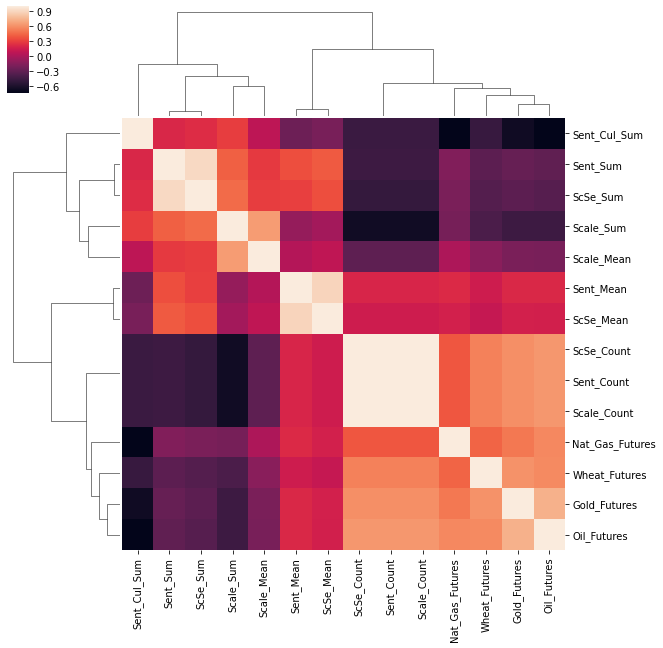

In [13]:
#Heat Map
import seaborn as sns
sns.clustermap(corr_k)

<AxesSubplot:>

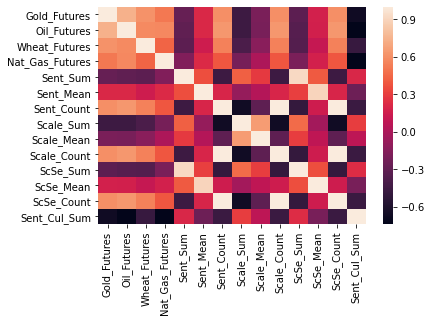

In [14]:
sns.heatmap(corr_k)

In [ ]:
####################################################################################################################

In [ ]:
#Data Science Manipulate Time Series
#https://towardsdatascience.com/every-pandas-function-you-can-should-use-to-manipulate-time-series-711cb0c5c749

In [15]:
cd2.tail()

Date  Gold_Futures  Oil_Futures  Wheat_Futures  Nat_Gas_Futures  \
99   4/25/22   1893.199951    98.540001        1062.00            6.669   
100  4/26/22   1901.400024   101.699997        1083.25            6.850   
101  4/27/22   1885.900024   102.019997        1080.00            7.267   
102  4/28/22   1888.699951   105.360001        1074.00            6.888   
103  4/29/22   1909.300049   104.690002        1043.75            7.244   

     Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  Scale_Mean  Scale_Count  \
99    -2635.0      -0.17     15717.0   -36474.0   -2.320672      15717.0   
100   -3859.0      -0.24     15976.0   -27256.0   -1.706059      15976.0   
101   -3603.0      -0.24     14941.0   -27635.7   -1.849655      14941.0   
102   -3314.0      -0.14     23727.0    -7103.7   -0.299393      23727.0   
103   -4477.0      -0.24     18353.0    -5001.3   -0.272506      18353.0   

     ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
99   -28553.8  -1.816746     15717.0     -616410.0  
100  -42725.7  -2.674368     15976.0     -620269.0  
101  -39186.1  -2.622723     14941.0     -623872.0  
102  -36851.5  -1.553146     23727.0     -627186.0  
103  -44580.1  -2.429036     18353.0     -631663.0

In [4]:
#Import Time Series Data
cd3 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Futures_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [5]:
cd3.tail()

Gold_Futures  Oil_Futures  Wheat_Futures  Nat_Gas_Futures  \
Date                                                                    
2022-04-25   1893.199951    98.540001        1062.00            6.669   
2022-04-26   1901.400024   101.699997        1083.25            6.850   
2022-04-27   1885.900024   102.019997        1080.00            7.267   
2022-04-28   1888.699951   105.360001        1074.00            6.888   
2022-04-29   1909.300049   104.690002        1043.75            7.244   

            Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  Scale_Mean  \
Date                                                                 
2022-04-25   -2635.0      -0.17     15717.0   -36474.0   -2.320672   
2022-04-26   -3859.0      -0.24     15976.0   -27256.0   -1.706059   
2022-04-27   -3603.0      -0.24     14941.0   -27635.7   -1.849655   
2022-04-28   -3314.0      -0.14     23727.0    -7103.7   -0.299393   
2022-04-29   -4477.0      -0.24     18353.0    -5001.3   -0.272506   

            Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
Date                                                                    
2022-04-25      15717.0  -28553.8  -1.816746     15717.0     -616410.0  
2022-04-26      15976.0  -42725.7  -2.674368     15976.0     -620269.0  
2022-04-27      14941.0  -39186.1  -2.622723     14941.0     -623872.0  
2022-04-28      23727.0  -36851.5  -1.553146     23727.0     -627186.0  
2022-04-29      18353.0  -44580.1  -2.429036     18353.0     -631663.0

In [30]:
#Getting only Gold Futures and Sentiment Sum
gt2 = cd3[["Oil_Futures", "Sent_Sum"]]
gt2.tail()

Oil_Futures  Sent_Sum
Date                             
2022-04-25    98.540001   -2635.0
2022-04-26   101.699997   -3859.0
2022-04-27   102.019997   -3603.0
2022-04-28   105.360001   -3314.0
2022-04-29   104.690002   -4477.0

In [27]:
#Normalizing the data into change in growth
gt2_norm = gt2.div(gt2.iloc[0])
gt2_norm.tail()

Gold_Futures  Sent_Cul_Sum
Date                                  
2022-04-25      1.062640   1394.592760
2022-04-26      1.067243   1403.323529
2022-04-27      1.058543   1411.475113
2022-04-28      1.060114   1418.972851
2022-04-29      1.071677   1429.101810

In [28]:
gt2_norm.head()

Gold_Futures  Sent_Cul_Sum
Date                                  
2021-12-01      1.000000      1.000000
2021-12-02      0.988269      6.846154
2021-12-03      1.000225     12.006787
2021-12-06      0.997699     18.018100
2021-12-07      1.000561     33.497738

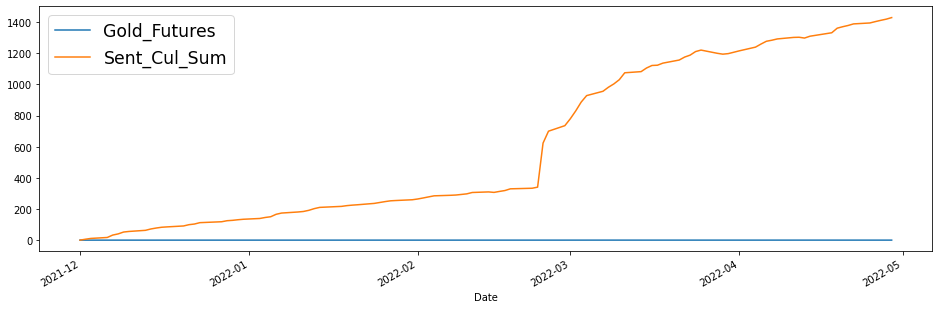

In [29]:
gt2_norm.plot(figsize=(16, 5))
plt.legend(fontsize="xx-large")

In [ ]:
###################################################################################################################

In [31]:
#Try the relationship between the changes
gt2.head()

Oil_Futures  Sent_Sum
Date                             
2021-12-01    65.570000    -442.0
2021-12-02    66.500000   -2584.0
2021-12-03    66.260002   -2281.0
2021-12-06    69.489998   -2657.0
2021-12-07    72.050003   -6842.0

In [33]:
gt2["Oil_Change"] = 0
lengt2 = len(gt2["Oil_Futures"])
gt3 = gt2.reset_index()
gt3.tail()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date  Oil_Futures  Sent_Sum  Gold_Change  Oil_Change
99  2022-04-25    98.540001   -2635.0            0           0
100 2022-04-26   101.699997   -3859.0            0           0
101 2022-04-27   102.019997   -3603.0            0           0
102 2022-04-28   105.360001   -3314.0            0           0
103 2022-04-29   104.690002   -4477.0            0           0

In [36]:
for i in range(1, lengt2):
    gt2["Oil_Change"][i] = gt2["Oil_Futures"][i] - gt2["Oil_Futures"][i-1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
gt2.head()

Oil_Futures  Sent_Sum  Gold_Change  Oil_Change
Date                                                      
2021-12-01    65.570000    -442.0            0           0
2021-12-02    66.500000   -2584.0            0           0
2021-12-03    66.260002   -2281.0            0           0
2021-12-06    69.489998   -2657.0            0           3
2021-12-07    72.050003   -6842.0            0           2

In [38]:
gt2["Sent_Sum_Change"] = 0
for i in range(1, lengt2):
    gt2["Sent_Sum_Change"][i] = gt2["Sent_Sum"][i] - gt2["Sent_Sum"][i-1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
gt2.head()

Oil_Futures  Sent_Sum  Gold_Change  Oil_Change  Sent_Sum_Change
Date                                                                       
2021-12-01    65.570000    -442.0            0           0                0
2021-12-02    66.500000   -2584.0            0           0            -2142
2021-12-03    66.260002   -2281.0            0           0              303
2021-12-06    69.489998   -2657.0            0           3             -376
2021-12-07    72.050003   -6842.0            0           2            -4185

In [40]:
gt2.tail()

Oil_Futures  Sent_Sum  Gold_Change  Oil_Change  Sent_Sum_Change
Date                                                                       
2022-04-25    98.540001   -2635.0            0          -3             1861
2022-04-26   101.699997   -3859.0            0           3            -1224
2022-04-27   102.019997   -3603.0            0           0              256
2022-04-28   105.360001   -3314.0            0           3              289
2022-04-29   104.690002   -4477.0            0           0            -1163

In [17]:
#For Linear 
from scipy.stats.stats import pearsonr
#For NonLinear
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

In [41]:
#Correlation Matrix with Spearman
corr_k = gt2.corr(method = "pearson")
corr_k

Oil_Futures  Sent_Sum  Gold_Change  Oil_Change  \
Oil_Futures         1.000000 -0.181277          NaN    0.095496   
Sent_Sum           -0.181277  1.000000          NaN   -0.059154   
Gold_Change              NaN       NaN          NaN         NaN   
Oil_Change          0.095496 -0.059154          NaN    1.000000   
Sent_Sum_Change     0.009193  0.591017          NaN   -0.032520   

                 Sent_Sum_Change  
Oil_Futures             0.009193  
Sent_Sum                0.591017  
Gold_Change                  NaN  
Oil_Change             -0.032520  
Sent_Sum_Change         1.000000

In [42]:
gt2["Oil_Norm"] = 0
for i in range(0, lengt2):
    if (gt2["Oil_Change"][i] >= 0):
        gt2["Oil_Norm"][i] = 1
    else:
        gt2["Oil_Norm"][i] = -1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [43]:
gt2.tail()

Oil_Futures  Sent_Sum  Gold_Change  Oil_Change  Sent_Sum_Change  \
Date                                                                          
2022-04-25    98.540001   -2635.0            0          -3             1861   
2022-04-26   101.699997   -3859.0            0           3            -1224   
2022-04-27   102.019997   -3603.0            0           0              256   
2022-04-28   105.360001   -3314.0            0           3              289   
2022-04-29   104.690002   -4477.0            0           0            -1163   

            Oil_Norm  
Date                  
2022-04-25        -1  
2022-04-26         1  
2022-04-27         1  
2022-04-28         1  
2022-04-29         1

In [44]:
gt2["Sent_Norm"] = 0
for i in range(0, lengt2):
    if (gt2["Sent_Sum_Change"][i] >= 0):
        gt2["Sent_Norm"][i] = 1
    else:
        gt2["Sent_Norm"][i] = -1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [45]:
gt2.tail()

Oil_Futures  Sent_Sum  Gold_Change  Oil_Change  Sent_Sum_Change  \
Date                                                                          
2022-04-25    98.540001   -2635.0            0          -3             1861   
2022-04-26   101.699997   -3859.0            0           3            -1224   
2022-04-27   102.019997   -3603.0            0           0              256   
2022-04-28   105.360001   -3314.0            0           3              289   
2022-04-29   104.690002   -4477.0            0           0            -1163   

            Oil_Norm  Sent_Norm  
Date                             
2022-04-25        -1          1  
2022-04-26         1         -1  
2022-04-27         1          1  
2022-04-28         1          1  
2022-04-29         1         -1

In [46]:
#Correlation Matrix with Spearman
corr_k2 = gt2.corr(method = "spearman")
corr_k2

Oil_Futures  Sent_Sum  Gold_Change  Oil_Change  \
Oil_Futures         1.000000 -0.456304          NaN    0.155652   
Sent_Sum           -0.456304  1.000000          NaN   -0.070396   
Gold_Change              NaN       NaN          NaN         NaN   
Oil_Change          0.155652 -0.070396          NaN    1.000000   
Sent_Sum_Change    -0.027787  0.340933          NaN   -0.018263   
Oil_Norm           -0.141362  0.096798          NaN    0.774930   
Sent_Norm          -0.006727  0.335088          NaN   -0.014710   

                 Sent_Sum_Change  Oil_Norm  Sent_Norm  
Oil_Futures            -0.027787 -0.141362  -0.006727  
Sent_Sum                0.340933  0.096798   0.335088  
Gold_Change                  NaN       NaN        NaN  
Oil_Change             -0.018263  0.774930  -0.014710  
Sent_Sum_Change         1.000000  0.007671   0.865905  
Oil_Norm                0.007671  1.000000  -0.010546  
Sent_Norm               0.865905 -0.010546   1.000000

In [71]:
len(gt2)

104

In [47]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [84]:
d1 = gt2['Sent_Sum']
d2 = gt2['Oil_Futures']
Days = 100
rs = [crosscorr(d1,d2, lag) for lag in range(-int(Days),int(Days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)

In [85]:
offset

-93.0

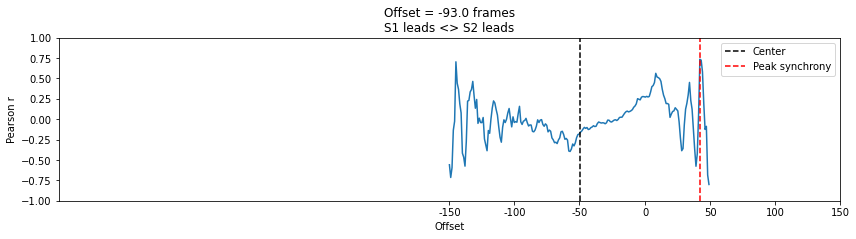

In [86]:
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-1,1],xlim=[-301,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [ ]:
#####################################################################################################################

In [131]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [132]:
#For Linear 
from scipy.stats.stats import pearsonr
#For NonLinear
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

In [88]:
ft = pd.read_csv("/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Ftse_csv.csv")
ft.tail()

Date      FTSE100  Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  \
99   4/26/22  7386.200195   -3859.0  -0.241550     15976.0   -27256.0   
100  4/27/22  7425.600098   -3603.0  -0.241149     14941.0   -27635.7   
101  4/28/22  7509.200195   -3314.0  -0.139672     23727.0    -7103.7   
102  4/29/22  7544.600098   -4477.0  -0.243938     18353.0    -5001.3   
103      NaN          NaN       NaN        NaN         NaN        NaN   

     Scale_Mean  Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
99    -1.706059      15976.0  -42725.7  -2.674368     15976.0     -613302.0  
100   -1.849655      14941.0  -39186.1  -2.622723     14941.0     -616905.0  
101   -0.299393      23727.0  -36851.5  -1.553146     23727.0     -620219.0  
102   -0.272506      18353.0  -44580.1  -2.429036     18353.0     -624696.0  
103         NaN          NaN       NaN        NaN         NaN           NaN

In [89]:
ft2 = ft.dropna()
ft2.tail()

Date      FTSE100  Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  \
98   4/25/22  7380.500000   -2635.0  -0.167653     15717.0   -36474.0   
99   4/26/22  7386.200195   -3859.0  -0.241550     15976.0   -27256.0   
100  4/27/22  7425.600098   -3603.0  -0.241149     14941.0   -27635.7   
101  4/28/22  7509.200195   -3314.0  -0.139672     23727.0    -7103.7   
102  4/29/22  7544.600098   -4477.0  -0.243938     18353.0    -5001.3   

     Scale_Mean  Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
98    -2.320672      15717.0  -28553.8  -1.816746     15717.0     -609443.0  
99    -1.706059      15976.0  -42725.7  -2.674368     15976.0     -613302.0  
100   -1.849655      14941.0  -39186.1  -2.622723     14941.0     -616905.0  
101   -0.299393      23727.0  -36851.5  -1.553146     23727.0     -620219.0  
102   -0.272506      18353.0  -44580.1  -2.429036     18353.0     -624696.0

In [91]:
#Getting only Gold Futures and Sentiment Sum
ft100 = ft2[["FTSE100", "Sent_Sum"]]
ft100.tail()

FTSE100  Sent_Sum
98   7380.500000   -2635.0
99   7386.200195   -3859.0
100  7425.600098   -3603.0
101  7509.200195   -3314.0
102  7544.600098   -4477.0

In [93]:
len(ft100)

103

In [92]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [116]:
d1 = ft100['Sent_Sum']
d2 = ft100['FTSE100']
Days = 50
rs = [crosscorr(d1,d2, lag) for lag in range(-int(Days),int(Days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)

In [117]:
offset

6.0

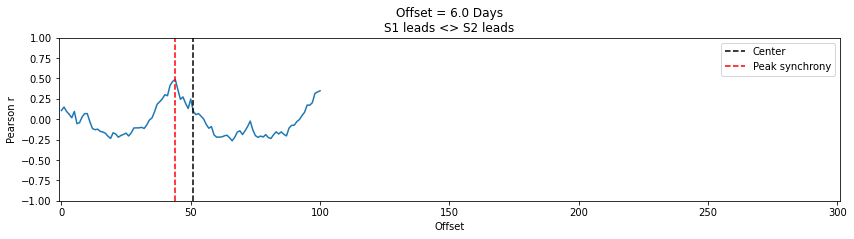

In [118]:
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} Days\nS1 leads <> S2 leads',ylim=[-1,1],xlim=[-1,301], xlabel='Offset',ylabel='Pearson r')
#ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
#ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [121]:
lenft2 = len(ft100)
ft100["FTSE_Change"] = 0
for i in range(1, lenft2):
    ft100["FTSE_Change"][i] = ft100["FTSE100"][i] - ft100["FTSE100"][i-1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [123]:
ft100.tail()

FTSE100  Sent_Sum  FTSE_Change
98   7380.500000   -2635.0         -141
99   7386.200195   -3859.0            5
100  7425.600098   -3603.0           39
101  7509.200195   -3314.0           83
102  7544.600098   -4477.0           35

In [126]:
ft100["Sent_Sum_Change"] = 0
for i in range(1, lenft2):
    ft100["Sent_Sum_Change"][i] = ft100["Sent_Sum"][i] - ft100["Sent_Sum"][i-1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
ft100.tail()

FTSE100  Sent_Sum  FTSE_Change  Sent_Sum_Change
98   7380.500000   -2635.0         -141             1861
99   7386.200195   -3859.0            5            -1224
100  7425.600098   -3603.0           39              256
101  7509.200195   -3314.0           83              289
102  7544.600098   -4477.0           35            -1163

In [129]:
ft100["FTSE_Norm"] = 0
for i in range(0, lenft2):
    if (ft100["FTSE_Change"][i] >= 0):
        ft100["FTSE_Norm"][i] = 1
    else:
        ft100["FTSE_Norm"][i] = -1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [130]:
ft100["Sent_Norm"] = 0
for i in range(0, lenft2):
    if (ft100["Sent_Sum_Change"][i] >= 0):
        ft100["Sent_Norm"][i] = 1
    else:
        ft100["Sent_Norm"][i] = -1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [131]:
ft100.tail()

FTSE100  Sent_Sum  FTSE_Change  Sent_Sum_Change  FTSE_Norm  Sent_Norm
98   7380.500000   -2635.0         -141             1861         -1          1
99   7386.200195   -3859.0            5            -1224          1         -1
100  7425.600098   -3603.0           39              256          1          1
101  7509.200195   -3314.0           83              289          1          1
102  7544.600098   -4477.0           35            -1163          1         -1

In [132]:
#Correlation Matrix with Spearman
corr_f = ft100.corr(method = "pearson")
corr_f

FTSE100  Sent_Sum  FTSE_Change  Sent_Sum_Change  FTSE_Norm  \
FTSE100          1.000000  0.246976     0.227563         0.104077   0.155455   
Sent_Sum         0.246976  1.000000     0.318216         0.591898   0.097565   
FTSE_Change      0.227563  0.318216     1.000000         0.466276   0.698732   
Sent_Sum_Change  0.104077  0.591898     0.466276         1.000000   0.119217   
FTSE_Norm        0.155455  0.097565     0.698732         0.119217   1.000000   
Sent_Norm       -0.042316  0.161056     0.052104         0.301995  -0.030589   

                 Sent_Norm  
FTSE100          -0.042316  
Sent_Sum          0.161056  
FTSE_Change       0.052104  
Sent_Sum_Change   0.301995  
FTSE_Norm        -0.030589  
Sent_Norm         1.000000

y=89.342883x+(-365.319650)


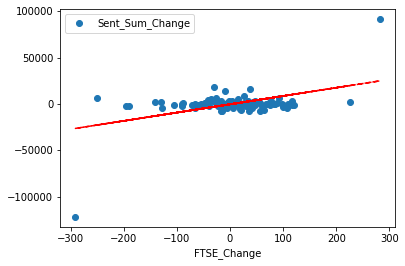

In [146]:
import pylab
ft100.plot(x = "FTSE_Change", y = "Sent_Sum_Change", style = "o")
x = ft100["FTSE_Change"]
y = ft100["Sent_Sum_Change"]
# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

In [ ]:
#####################################################################################################################

In [3]:
#Granger Causality Test
#FTSE 100 Test
#https://www.maths.usyd.edu.au/u/jchan/Consult/W10_CompareTwoTimeSeries.pdf
#https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/
from statsmodels.tsa.stattools import grangercausalitytests
?grangercausalitytests

In [4]:
ft100 = pd.read_csv("/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/Ftse_csv.csv")
ft100.tail()

Date      FTSE100  Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  \
99   4/26/22  7386.200195   -3859.0  -0.241550     15976.0   -27256.0   
100  4/27/22  7425.600098   -3603.0  -0.241149     14941.0   -27635.7   
101  4/28/22  7509.200195   -3314.0  -0.139672     23727.0    -7103.7   
102  4/29/22  7544.600098   -4477.0  -0.243938     18353.0    -5001.3   
103      NaN          NaN       NaN        NaN         NaN        NaN   

     Scale_Mean  Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
99    -1.706059      15976.0  -42725.7  -2.674368     15976.0     -613302.0  
100   -1.849655      14941.0  -39186.1  -2.622723     14941.0     -616905.0  
101   -0.299393      23727.0  -36851.5  -1.553146     23727.0     -620219.0  
102   -0.272506      18353.0  -44580.1  -2.429036     18353.0     -624696.0  
103         NaN          NaN       NaN        NaN         NaN           NaN

In [5]:
ft100.tail()

Date      FTSE100  Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  \
99   4/26/22  7386.200195   -3859.0  -0.241550     15976.0   -27256.0   
100  4/27/22  7425.600098   -3603.0  -0.241149     14941.0   -27635.7   
101  4/28/22  7509.200195   -3314.0  -0.139672     23727.0    -7103.7   
102  4/29/22  7544.600098   -4477.0  -0.243938     18353.0    -5001.3   
103      NaN          NaN       NaN        NaN         NaN        NaN   

     Scale_Mean  Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
99    -1.706059      15976.0  -42725.7  -2.674368     15976.0     -613302.0  
100   -1.849655      14941.0  -39186.1  -2.622723     14941.0     -616905.0  
101   -0.299393      23727.0  -36851.5  -1.553146     23727.0     -620219.0  
102   -0.272506      18353.0  -44580.1  -2.429036     18353.0     -624696.0  
103         NaN          NaN       NaN        NaN         NaN           NaN

In [6]:
ft100_2 = ft100[["FTSE100", "Sent_Sum"]]
ft100_2.tail()

FTSE100  Sent_Sum
99   7386.200195   -3859.0
100  7425.600098   -3603.0
101  7509.200195   -3314.0
102  7544.600098   -4477.0
103          NaN       NaN

In [158]:
gc_res = grangercausalitytests(ft100_2, [2])
gc_res


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.8284  , p=0.0100  , df_denom=96, df_num=2
ssr based chi2 test:   chi2=10.1598 , p=0.0062  , df=2
likelihood ratio test: chi2=9.6806  , p=0.0079  , df=2
parameter F test:         F=4.8284  , p=0.0100  , df_denom=96, df_num=2


{2: ({'ssr_ftest': (4.82839609808542, 0.01004483882540132, 96.0, 2),
   'ssr_chi2test': (10.159750123054739, 0.006220686170422163, 2),
   'lrtest': (9.680631852835859, 0.007904556398888554, 2),
   'params_ftest': (4.828396098085456, 0.010044838825400967, 96.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [15]:
maxlag = 1
test = 'ssr_chi2test'

In [16]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [6]:
#Import Time Series Data
ft2 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/Ftse_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [7]:
ft2.tail()

FTSE100  Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  \
Date                                                                  
2022-04-25  7380.500000   -2635.0  -0.167653     15717.0   -36474.0   
2022-04-26  7386.200195   -3859.0  -0.241550     15976.0   -27256.0   
2022-04-27  7425.600098   -3603.0  -0.241149     14941.0   -27635.7   
2022-04-28  7509.200195   -3314.0  -0.139672     23727.0    -7103.7   
2022-04-29  7544.600098   -4477.0  -0.243938     18353.0    -5001.3   

            Scale_Mean  Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  \
Date                                                                   
2022-04-25   -2.320672      15717.0  -28553.8  -1.816746     15717.0   
2022-04-26   -1.706059      15976.0  -42725.7  -2.674368     15976.0   
2022-04-27   -1.849655      14941.0  -39186.1  -2.622723     14941.0   
2022-04-28   -0.299393      23727.0  -36851.5  -1.553146     23727.0   
2022-04-29   -0.272506      18353.0  -44580.1  -2.429036     18353.0   

            Sent_Cul_Sum  
Date                      
2022-04-25     -609443.0  
2022-04-26     -613302.0  
2022-04-27     -616905.0  
2022-04-28     -620219.0  
2022-04-29     -624696.0

In [8]:
grangers_causation_matrix(ft2, variables = ft2.columns)  

FTSE100_x  Sent_Sum_x  Sent_Mean_x  Sent_Count_x  Scale_Sum_x  \
FTSE100_y          1.0000      0.0035       0.7561        0.0024       0.0004   
Sent_Sum_y         0.7974      1.0000       0.1896        0.0718       0.0056   
Sent_Mean_y        0.0992      0.2000       1.0000        0.1925       0.3076   
Sent_Count_y       0.8879      0.1217       0.2195        1.0000       0.5488   
Scale_Sum_y        0.8063      0.0135       0.1661        0.3790       1.0000   
Scale_Mean_y       0.7751      0.6538       0.0649        0.1102       0.1619   
Scale_Count_y      0.8879      0.1217       0.2195        1.0000       0.5488   
ScSe_Sum_y         0.8246      0.8480       0.1820        0.0355       0.0013   
ScSe_Mean_y        0.0594      0.3588       0.1305        0.3332       0.4779   
ScSe_Count_y       0.8879      0.1217       0.2195        1.0000       0.5488   
Sent_Cul_Sum_y     0.2835      0.0020       0.2547        0.0004       0.0004   

                Scale_Mean_x  Scale_Count_x  ScSe_Sum_x  ScSe_Mean_x  \
FTSE100_y             0.0017         0.0024      0.0033       0.6860   
Sent_Sum_y            0.0123         0.0718      0.8042       0.1295   
Sent_Mean_y           0.3202         0.1925      0.1960       0.2219   
Sent_Count_y          0.0354         1.0000      0.0693       0.1465   
Scale_Sum_y           0.0550         0.3790      0.0034       0.0955   
Scale_Mean_y          1.0000         0.1102      0.6017       0.0512   
Scale_Count_y         0.0354         1.0000      0.0693       0.1465   
ScSe_Sum_y            0.0134         0.0355      1.0000       0.1234   
ScSe_Mean_y           0.4202         0.3332      0.3413       1.0000   
ScSe_Count_y          0.0354         1.0000      0.0693       0.1465   
Sent_Cul_Sum_y        0.0019         0.0004      0.0020       0.2011   

                ScSe_Count_x  Sent_Cul_Sum_x  
FTSE100_y             0.0024          0.0061  
Sent_Sum_y            0.0718          0.8207  
Sent_Mean_y           0.1925          0.0153  
Sent_Count_y          1.0000          0.4956  
Scale_Sum_y           0.3790          0.0970  
Scale_Mean_y          0.1102          0.6068  
Scale_Count_y         1.0000          0.4956  
ScSe_Sum_y            0.0355          0.7557  
ScSe_Mean_y           0.3332          0.0599  
ScSe_Count_y          1.0000          0.4956  
Sent_Cul_Sum_y        0.0004          1.0000

In [164]:
gc_res_rev = grangercausalitytests(ft100_2[["Sent_Sum", "FTSE100"]], [2])
gc_res_rev


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0355  , p=0.9651  , df_denom=96, df_num=2
ssr based chi2 test:   chi2=0.0747  , p=0.9634  , df=2
likelihood ratio test: chi2=0.0746  , p=0.9634  , df=2
parameter F test:         F=0.0355  , p=0.9651  , df_denom=96, df_num=2


{2: ({'ssr_ftest': (0.03548559116117657, 0.9651492941239975, 96.0, 2),
   'ssr_chi2test': (0.07466759806830903, 0.9633545148671255, 2),
   'lrtest': (0.07464001141534027, 0.9633678028221118, 2),
   'params_ftest': (0.0354855911611752, 0.9651492941239975, 96.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [ ]:
#SO THIS MEANS THAT THE SENTIMENT SUM IS A GOOD INDICATOR FOR FUTURE CHANGES IN THE FTSE100???

In [12]:
#Import Time Series Data
cd4 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/Futures_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [13]:
#Getting only Gold Futures and Sentiment Sum
gt2 = cd4[["Oil_Futures", "Sent_Sum"]]
gt2.tail()

Oil_Futures  Sent_Sum
Date                             
2022-04-25    98.540001   -2635.0
2022-04-26   101.699997   -3859.0
2022-04-27   102.019997   -3603.0
2022-04-28   105.360001   -3314.0
2022-04-29   104.690002   -4477.0

In [167]:
grangers_causation_matrix(gt2, variables = gt2.columns)  

Oil_Futures_x  Sent_Sum_x
Oil_Futures_y         1.0000         0.0
Sent_Sum_y            0.2595         1.0

In [15]:
grangers_causation_matrix(cd4, variables = cd4.columns)

Gold_Futures_x  Oil_Futures_x  Wheat_Futures_x  \
Gold_Futures_y             1.0000         0.0009           0.0000   
Oil_Futures_y              0.1593         1.0000           0.0000   
Wheat_Futures_y            0.0000         0.0001           1.0000   
Nat_Gas_Futures_y          0.0647         0.1287           0.1225   
Sent_Sum_y                 0.0900         0.2595           0.2824   
Sent_Mean_y                0.0538         0.0120           0.0712   
Sent_Count_y               0.0285         0.1233           0.2460   
Scale_Sum_y                0.1478         0.3466           0.3687   
Scale_Mean_y               0.1074         0.0036           0.0077   
Scale_Count_y              0.0285         0.1233           0.2460   
ScSe_Sum_y                 0.0779         0.2251           0.2609   
ScSe_Mean_y                0.1464         0.0505           0.1276   
ScSe_Count_y               0.0285         0.1233           0.2460   
Sent_Cul_Sum_y             0.0001         0.0373           0.0484   

                   Nat_Gas_Futures_x  Sent_Sum_x  Sent_Mean_x  Sent_Count_x  \
Gold_Futures_y                0.5958      0.0000       0.1241        0.0000   
Oil_Futures_y                 0.4260      0.0000       0.0000        0.0000   
Wheat_Futures_y               0.3154      0.0000       0.1328        0.0000   
Nat_Gas_Futures_y             1.0000      0.7712       0.1920        0.8738   
Sent_Sum_y                    0.8917      1.0000       0.0354        0.0676   
Sent_Mean_y                   0.0778      0.1580       1.0000        0.2028   
Sent_Count_y                  0.6677      0.1289       0.0643        1.0000   
Scale_Sum_y                   0.8923      0.0101       0.0438        0.3698   
Scale_Mean_y                  0.2984      0.0067       0.0405        0.0073   
Scale_Count_y                 0.6677      0.1289       0.0643        1.0000   
ScSe_Sum_y                    0.8745      0.7396       0.0373        0.0327   
ScSe_Mean_y                   0.1640      0.1115       0.0609        0.1982   
ScSe_Count_y                  0.6677      0.1289       0.0643        1.0000   
Sent_Cul_Sum_y                0.4440      0.0018       0.0156        0.0003   

                   Scale_Sum_x  Scale_Mean_x  Scale_Count_x  ScSe_Sum_x  \
Gold_Futures_y          0.0000        0.0027         0.0000      0.0000   
Oil_Futures_y           0.0000        0.0000         0.0000      0.0000   
Wheat_Futures_y         0.0000        0.0010         0.0000      0.0000   
Nat_Gas_Futures_y       0.8386        0.4750         0.8738      0.7835   
Sent_Sum_y              0.0050        0.0021         0.0676      0.7145   
Sent_Mean_y             0.1991        0.3674         0.2028      0.1810   
Sent_Count_y            0.5257        0.0003         1.0000      0.0724   
Scale_Sum_y             1.0000        0.0006         0.3698      0.0009   
Scale_Mean_y            0.0091        1.0000         0.0073      0.0044   
Scale_Count_y           0.5257        0.0003         1.0000      0.0724   
ScSe_Sum_y              0.0008        0.0016         0.0327      1.0000   
ScSe_Mean_y             0.1464        0.4261         0.1982      0.1289   
ScSe_Count_y            0.5257        0.0003         1.0000      0.0724   
Sent_Cul_Sum_y          0.0004        0.0017         0.0003      0.0018   

                   ScSe_Mean_x  ScSe_Count_x  Sent_Cul_Sum_x  
Gold_Futures_y          0.0665        0.0000          0.0000  
Oil_Futures_y           0.0000        0.0000          0.0000  
Wheat_Futures_y         0.1904        0.0000          0.0000  
Nat_Gas_Futures_y       0.1978        0.8738          0.0011  
Sent_Sum_y              0.0066        0.0676          0.7967  
Sent_Mean_y             0.1379        0.2028          0.0227  
Sent_Count_y            0.0174        1.0000          0.3652  
Scale_Sum_y             0.0080        0.3698          0.0123  
Scale_Mean_y            0.0247        0.0073          0.5192  
Scale_Count_y           0.0174        1.0

In [ ]:
#################################################################################################################

In [183]:
#Import Time Series Data
cd3 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/US_1.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [10]:
cd3.tail()

S_P        MSCI    VIX  10_Year_Treasury  Defense_ETF  \
Date                                                                        
2022-04-25  4296.120117  462.299988  27.02             2.826   107.639999   
2022-04-26  4175.200195  429.809998  33.52             2.772   106.160004   
2022-04-27  4183.959961  417.779999  31.60             2.818   105.300003   
2022-04-28  4287.500000  433.380005  29.99             2.863   105.870003   
2022-04-29  4131.930176  421.250000  33.40             2.887   102.860001   

            Metals_ETF     HY_ETF     IG_ETF  10Y_Futures  Bitcoin_Futures  \
Date                                                                         
2022-04-25   57.290001  37.770000  52.799999   119.609375      40210.00000   
2022-04-26   56.290001  37.549999  52.820000   120.046875      38220.00000   
2022-04-27   57.299999  37.340000  52.369999   119.796875      38900.00000   
2022-04-28   58.360001  37.520000  52.560001   119.359375      39920.00000   
2022-04-29   56.209999  37.040001  52.060001   119.156250      38997.30078   

            Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  Scale_Mean  \
Date                                                                 
2022-04-25     -2635  -0.167653       15717   -36474.0   -2.320672   
2022-04-26     -3859  -0.241550       15976   -27256.0   -1.706059   
2022-04-27     -3603  -0.241149       14941   -27635.7   -1.849655   
2022-04-28     -3314  -0.139672       23727    -7103.7   -0.299393   
2022-04-29     -4477  -0.243938       18353    -5001.3   -0.272506   

            Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
Date                                                                    
2022-04-25        15717  -28553.8  -1.816746       15717       -616410  
2022-04-26        15976  -42725.7  -2.674368       15976       -620269  
2022-04-27        14941  -39186.1  -2.622723       14941       -623872  
2022-04-28        23727  -36851.5  -1.553146       23727       -627186  
2022-04-29        18353  -44580.1  -2.429036       18353       -631663

In [11]:
grangers_causation_matrix(cd3, variables = cd3.columns)  

S_P_x  MSCI_x   VIX_x  10_Year_Treasury_x  Defense_ETF_x  \
S_P_y               1.0000  0.0376  0.0156              0.0065         0.0127   
MSCI_y              0.1520  1.0000  0.0161              0.0149         0.0071   
VIX_y               0.0664  0.0508  1.0000              0.0318         0.0391   
10_Year_Treasury_y  0.2928  0.0265  0.2857              1.0000         0.1599   
Defense_ETF_y       0.1225  0.6266  0.0176              0.0572         1.0000   
Metals_ETF_y        0.2355  0.5198  0.2378              0.1193         0.1121   
HY_ETF_y            0.0917  0.2900  0.0059              0.0009         0.0133   
IG_ETF_y            0.1551  0.1351  0.2052              0.1432         0.1138   
10Y_Futures_y       0.2875  0.0552  0.3674              0.2086         0.2402   
Bitcoin_Futures_y   0.0694  0.1805  0.0317              0.3402         0.1546   
Sent_Sum_y          0.0081  0.2727  0.0139              0.0654         0.6807   
Sent_Mean_y         0.0284  0.0015  0.2274              0.0033         0.0489   
Sent_Count_y        0.0017  0.0883  0.0066              0.3925         0.3185   
Scale_Sum_y         0.0150  0.3264  0.0166              0.2344         0.2501   
Scale_Mean_y        0.0422  0.0038  0.2740              0.0035         0.1423   
Scale_Count_y       0.0017  0.0883  0.0066              0.3925         0.3185   
ScSe_Sum_y          0.0071  0.2415  0.0134              0.0764         0.6504   
ScSe_Mean_y         0.0801  0.0074  0.1960              0.0098         0.1090   
ScSe_Count_y        0.0017  0.0883  0.0066              0.3925         0.3185   
Sent_Cul_Sum_y      0.0003  0.0872  0.0019              0.0642         0.6914   

                    Metals_ETF_x  HY_ETF_x  IG_ETF_x  10Y_Futures_x  \
S_P_y                     0.0022    0.0956    0.0282         0.0189   
MSCI_y                    0.0011    0.1794    0.0021         0.0146   
VIX_y                     0.1188    0.1651    0.0691         0.0508   
10_Year_Treasury_y        0.0151    0.0851    0.1526         0.2181   
Defense_ETF_y             0.0087    0.3522    0.1998         0.0881   
Metals_ETF_y              1.0000    0.0403    0.0880         0.1532   
HY_ETF_y                  0.0000    1.0000    0.0046         0.0042   
IG_ETF_y                  0.0004    0.0075    1.0000         0.1644   
10Y_Futures_y             0.0089    0.0977    0.1884         1.0000   
Bitcoin_Futures_y         0.6252    0.5523    0.2264         0.1820   
Sent_Sum_y                0.4670    0.1642    0.0134         0.0527   
Sent_Mean_y               0.0604    0.0003    0.0011         0.0021   
Sent_Count_y              0.2673    0.0944    0.1561         0.3765   
Scale_Sum_y               0.6262    0.2278    0.0682         0.2132   
Scale_Mean_y              0.1617    0.0156    0.0102         0.0039   
Scale_Count_y             0.2673    0.0944    0.1561         0.3765   
ScSe_Sum_y                0.4468    0.1718    0.0173         0.0589   
ScSe_Mean_y               0.1633    0.0004    0.0014         0.0024   
ScSe_Count_y              0.2673    0.0944    0.1561         0.3765   
Sent_Cul_Sum_y            0.1819    0.0074    0.0005         0.0422   

                    Bitcoin_Futures_x  Sent_Sum_x  Sent_Mean_x  Sent_Count_x  \
S_P_y                          0.0048      0.0100       0.5118        0.0011   
MSCI_y                         0.1038      0.0129       0.1182        0.0130   
VIX_y                          0.0028      0.0090       0.3626        0.0021   
10_Year_Treasury_y             0.1451      0.0000       0.0001        0.0000   
Defense_ETF_y                  0.0006      0.0000       0.1702        0.0000   
Metals_ETF_y                   0.1126      0.0024       0.0000        0.0010   
HY_ETF_y                       0.0172      0.3556       0.0220        0.0448   
IG_ETF_y                       0.0686      0.0090       0.0001        0.0080   
10Y_Futures_y                  0.0764      0.0000       0.0000        0.0000   
Bitcoin_Futures_y          

In [174]:
#Import Time Series Data
mf3 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/MSCI_Futures.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [21]:
mf3.tail()

MSCI-Future  Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  \
Date                                                                  
2022-04-25  2893.100098   -2635.0  -0.167653     15717.0   -36474.0   
2022-04-26  2814.399902   -3859.0  -0.241550     15976.0   -27256.0   
2022-04-27  2821.300049   -3603.0  -0.241149     14941.0   -27635.7   
2022-04-28  2879.600098   -3314.0  -0.139672     23727.0    -7103.7   
2022-04-29  2797.000000   -4477.0  -0.243938     18353.0    -5001.3   

            Scale_Mean  Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  \
Date                                                                   
2022-04-25   -2.320672      15717.0  -28553.8  -1.816746     15717.0   
2022-04-26   -1.706059      15976.0  -42725.7  -2.674368     15976.0   
2022-04-27   -1.849655      14941.0  -39186.1  -2.622723     14941.0   
2022-04-28   -0.299393      23727.0  -36851.5  -1.553146     23727.0   
2022-04-29   -0.272506      18353.0  -44580.1  -2.429036     18353.0   

            Sent_Cul_Sum  
Date                      
2022-04-25     -578386.0  
2022-04-26     -582245.0  
2022-04-27     -585848.0  
2022-04-28     -589162.0  
2022-04-29     -593639.0

In [23]:
grangers_causation_matrix(mf3, variables = mf3.columns)

MSCI-Future_x  Sent_Sum_x  Sent_Mean_x  Sent_Count_x  \
MSCI-Future_y          1.0000      0.0030       0.3377        0.0001   
Sent_Sum_y             0.0295      1.0000       0.0523        0.1112   
Sent_Mean_y            0.1294      0.2505       1.0000        0.3296   
Sent_Count_y           0.0112      0.2016       0.0861        1.0000   
Scale_Sum_y            0.0635      0.0204       0.0463        0.4752   
Scale_Mean_y           0.0075      0.0158       0.0597        0.0033   
Scale_Count_y          0.0112      0.2016       0.0861        1.0000   
ScSe_Sum_y             0.0270      0.7820       0.0541        0.0607   
ScSe_Mean_y            0.2036      0.2130       0.0077        0.3291   
ScSe_Count_y           0.0112      0.2016       0.0861        1.0000   
Sent_Cul_Sum_y         0.0012      0.0037       0.0206        0.0009   

                Scale_Sum_x  Scale_Mean_x  Scale_Count_x  ScSe_Sum_x  \
MSCI-Future_y        0.0011        0.1404         0.0001      0.0015   
Sent_Sum_y           0.0101        0.0065         0.1112      0.7622   
Sent_Mean_y          0.3717        0.4981         0.3296      0.2444   
Sent_Count_y         0.6524        0.0004         1.0000      0.1253   
Scale_Sum_y          1.0000        0.0012         0.4752      0.0024   
Scale_Mean_y         0.0121        1.0000         0.0033      0.0097   
Scale_Count_y        0.6524        0.0004         1.0000      0.1253   
ScSe_Sum_y           0.0023        0.0048         0.0607      1.0000   
ScSe_Mean_y          0.2824        0.5386         0.3291      0.2425   
ScSe_Count_y         0.6524        0.0004         1.0000      0.1253   
Sent_Cul_Sum_y       0.0011        0.0031         0.0009      0.0037   

                ScSe_Mean_x  ScSe_Count_x  Sent_Cul_Sum_x  
MSCI-Future_y        0.1726        0.0001          0.0029  
Sent_Sum_y           0.0097        0.1112          0.9928  
Sent_Mean_y          0.0221        0.3296          0.1380  
Sent_Count_y         0.0264        1.0000          0.4645  
Scale_Sum_y          0.0098        0.4752          0.0241  
Scale_Mean_y         0.0413        0.0033          0.3473  
Scale_Count_y        0.0264        1.0000          0.4645  
ScSe_Sum_y           0.0105        0.0607          0.9528  
ScSe_Mean_y          1.0000        0.3291          0.3123  
ScSe_Count_y         0.0264        1.0000          0.4645  
Sent_Cul_Sum_y       0.0046        0.0009          1.0000

In [164]:
#Import Time Series Data
y2 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/2y_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [28]:
y2.tail()

2Y Treasury Yield  Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  \
Date                                                                        
2022-04-25              2.722   -2635.0  -0.167653     15717.0   -36474.0   
2022-04-26              2.500   -3859.0  -0.241550     15976.0   -27256.0   
2022-04-27              2.551   -3603.0  -0.241149     14941.0   -27635.7   
2022-04-28              2.572   -3314.0  -0.139672     23727.0    -7103.7   
2022-04-29              2.719   -4477.0  -0.243938     18353.0    -5001.3   

            Scale_Mean  Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  \
Date                                                                   
2022-04-25   -2.320672      15717.0  -28553.8  -1.816746     15717.0   
2022-04-26   -1.706059      15976.0  -42725.7  -2.674368     15976.0   
2022-04-27   -1.849655      14941.0  -39186.1  -2.622723     14941.0   
2022-04-28   -0.299393      23727.0  -36851.5  -1.553146     23727.0   
2022-04-29   -0.272506      18353.0  -44580.1  -2.429036     18353.0   

            Sent_Cul_Sum  
Date                      
2022-04-25     -617862.0  
2022-04-26     -621721.0  
2022-04-27     -625324.0  
2022-04-28     -628638.0  
2022-04-29     -633115.0

In [29]:
grangers_causation_matrix(y2, variables = y2.columns)

2Y Treasury Yield_x  Sent_Sum_x  Sent_Mean_x  \
2Y Treasury Yield_y               1.0000      0.0000       0.1763   
Sent_Sum_y                        0.0031      1.0000       0.2090   
Sent_Mean_y                       0.0015      0.1762       1.0000   
Sent_Count_y                      0.0023      0.1282       0.1004   
Scale_Sum_y                       0.0045      0.0131       0.0632   
Scale_Mean_y                      0.5456      0.0059       0.0718   
Scale_Count_y                     0.0023      0.1282       0.1004   
ScSe_Sum_y                        0.0023      0.8604       0.1881   
ScSe_Mean_y                       0.0045      0.1406       0.0476   
ScSe_Count_y                      0.0023      0.1282       0.1004   
Sent_Cul_Sum_y                    0.0003      0.0014       0.0943   

                     Sent_Count_x  Scale_Sum_x  Scale_Mean_x  Scale_Count_x  \
2Y Treasury Yield_y        0.0009       0.0006        0.0611         0.0009   
Sent_Sum_y                 0.0739       0.0041        0.0016         0.0739   
Sent_Mean_y                0.1617       0.2023        0.2011         0.1617   
Sent_Count_y               1.0000       0.5189        0.0001         1.0000   
Scale_Sum_y                0.3534       1.0000        0.0002         0.3534   
Scale_Mean_y               0.0031       0.0054        1.0000         0.0031   
Scale_Count_y              1.0000       0.5189        0.0001         1.0000   
ScSe_Sum_y                 0.0375       0.0009        0.0008         0.0375   
ScSe_Mean_y                0.2171       0.1485        0.3079         0.2171   
ScSe_Count_y               1.0000       0.5189        0.0001         1.0000   
Sent_Cul_Sum_y             0.0003       0.0003        0.0010         0.0003   

                     ScSe_Sum_x  ScSe_Mean_x  ScSe_Count_x  Sent_Cul_Sum_x  
2Y Treasury Yield_y      0.0000       0.1366        0.0009          0.0004  
Sent_Sum_y               0.8617       0.0742        0.0739          0.8033  
Sent_Mean_y              0.1680       0.0889        0.1617          0.0146  
Sent_Count_y             0.0726       0.0364        1.0000          0.3579  
Scale_Sum_y              0.0010       0.0154        0.3534          0.0160  
Scale_Mean_y             0.0036       0.0497        0.0031          0.5581  
Scale_Count_y            0.0726       0.0364        1.0000          0.3579  
ScSe_Sum_y               1.0000       0.0619        0.0375          0.7433  
ScSe_Mean_y              0.1638       1.0000        0.2171          0.0526  
ScSe_Count_y             0.0726       0.0364        1.0000          0.3579  
Sent_Cul_Sum_y           0.0014       0.0379        0.0003          1.0000

In [49]:
#Import Time Series Data
fx2 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/FX_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [31]:
fx2.tail()

EUR         JPY       GBP       AUD        MXN   EURGBP  \
Date                                                                       
2022-04-25  1.081105  128.604996  1.283088  0.723694  20.232000  0.84260   
2022-04-26  1.071421  127.744003  1.273999  0.717850  20.214600  0.84087   
2022-04-27  1.064362  127.265999  1.258400  0.714600  20.380320  0.84574   
2022-04-28  1.055509  128.393997  1.254186  0.712570  20.372299  0.84151   
2022-04-29  1.050420  130.811005  1.246385  0.710884  20.441299  0.84260   

                 ZAR        RUB     CNY  Sent_Sum  ...  Sent_Count  Scale_Sum  \
Date                                               ...                          
2022-04-25  15.56954  77.339996  6.5003   -2635.0  ...     15717.0   -36474.0   
2022-04-26  15.67310  75.739998  6.5579   -3859.0  ...     15976.0   -27256.0   
2022-04-27  15.82465  74.214996  6.5563   -3603.0  ...     14941.0   -27635.7   
2022-04-28  15.86366  73.839996  6.5595   -3314.0  ...     23727.0    -7103.7   
2022-04-29  15.98250  72.714996  6.6253   -4477.0  ...     18353.0    -5001.3   

            Scale_Mean  Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  \
Date                                                                   
2022-04-25   -2.320672      15717.0  -28553.8  -1.816746     15717.0   
2022-04-26   -1.706059      15976.0  -42725.7  -2.674368     15976.0   
2022-04-27   -1.849655      14941.0  -39186.1  -2.622723     14941.0   
2022-04-28   -0.299393      23727.0  -36851.5  -1.553146     23727.0   
2022-04-29   -0.272506      18353.0  -44580.1  -2.429036     18353.0   

            sent_cul_sum  scale_cul_sum  scse_cul_sum  
Date                                                   
2022-04-25     -633946.0    -12334999.5    -6471561.9  
2022-04-26     -637805.0    -12362255.5    -6514287.6  
2022-04-27     -641408.0    -12389891.2    -6553473.7  
2022-04-28     -644722.0    -12396994.9    -6590325.2  
2022-04-29     -649199.0    -12401996.2    -6634905.3  

[5 rows x 21 columns]

In [33]:
pd.set_option('display.max_columns', 500)
grangers_causation_matrix(fx2, variables = fx2.columns)

EUR_x   JPY_x   GBP_x   AUD_x   MXN_x  EURGBP_x   ZAR_x  \
EUR_y            1.0000  0.0025  0.0819  0.1240  0.0001    0.0733  0.0007   
JPY_y            0.0000  1.0000  0.0040  0.1462  0.0223    0.0893  0.1833   
GBP_y            0.0471  0.0020  1.0000  0.0136  0.0043    0.0502  0.0295   
AUD_y            0.3779  0.0238  0.3345  1.0000  0.0012    0.2758  0.0806   
MXN_y            0.0165  0.0004  0.1166  0.0024  1.0000    0.0229  0.1013   
EURGBP_y         0.3648  0.1160  0.3621  0.3146  0.0026    1.0000  0.1155   
ZAR_y            0.0549  0.0288  0.1827  0.2854  0.0435    0.1396  1.0000   
RUB_y            0.0175  0.0211  0.1535  0.0014  0.0226    0.0382  0.6543   
CNY_y            0.0004  0.0035  0.0134  0.0089  0.0144    0.0021  0.0007   
Sent_Sum_y       0.8370  0.5296  0.5174  0.3432  0.7436    0.2051  0.4620   
Sent_Mean_y      0.1188  0.0003  0.1288  0.1354  0.0633    0.0360  0.0010   
Sent_Count_y     0.7287  0.7009  0.6866  0.3527  0.4780    0.2135  0.1498   
Scale_Sum_y      0.5848  0.6040  0.3133  0.4449  0.5778    0.2490  0.3062   
Scale_Mean_y     0.0459  0.1063  0.1233  0.1815  0.0536    0.1616  0.0060   
Scale_Count_y    0.7287  0.7009  0.6866  0.3527  0.4780    0.2135  0.1498   
ScSe_Sum_y       0.8483  0.5609  0.5477  0.3333  0.6857    0.1993  0.4068   
ScSe_Mean_y      0.2606  0.0012  0.2358  0.1505  0.0842    0.0624  0.0033   
ScSe_Count_y     0.7287  0.7009  0.6866  0.3527  0.4780    0.2135  0.1498   
sent_cul_sum_y   0.2150  0.0105  0.0590  0.3185  0.7275    0.1264  0.4127   
scale_cul_sum_y  0.0174  0.0025  0.0028  0.4674  0.6400    0.0786  0.1610   
scse_cul_sum_y   0.2079  0.0098  0.0526  0.3123  0.7610    0.1208  0.3791   

                  RUB_x   CNY_x  Sent_Sum_x  Sent_Mean_x  Sent_Count_x  \
EUR_y            0.0001  0.0760      0.0000       0.1202        0.0000   
JPY_y            0.0002  0.0006      0.0963       0.1542        0.0610   
GBP_y            0.0020  0.1270      0.0000       0.2741        0.0000   
AUD_y            0.0091  0.0057      0.0540       0.4466        0.0030   
MXN_y            0.0002  0.0178      0.0000       0.1855        0.0000   
EURGBP_y         0.0015  0.0921      0.1531       0.0088        0.0047   
ZAR_y            0.0167  0.0293      0.1116       0.2802        0.1229   
RUB_y            1.0000  0.0035      0.0000       0.0118        0.0000   
CNY_y            0.0834  1.0000      0.0698       0.1822        0.0689   
Sent_Sum_y       0.3016  0.1187      1.0000       0.1425        0.0729   
Sent_Mean_y      0.0408  0.4721      0.1636       1.0000        0.1641   
Sent_Count_y     0.1823  0.2082      0.1152       0.0912        1.0000   
Scale_Sum_y      0.4868  0.1095      0.0074       0.0446        0.3488   
Scale_Mean_y     0.1745  0.0105      0.0184       0.0317        0.0103   
Scale_Count_y    0.1823  0.2082      0.1152       0.0912        1.0000   
ScSe_Sum_y       0.2897  0.1298      0.8394       0.1286        0.0356   
ScSe_Mean_y      0.0838  0.7104      0.1594       0.0948        0.2394   
ScSe_Count_y     0.1823  0.2082      0.1152       0.0912        1.0000   
sent_cul_sum_y   0.1555  0.0126      0.0014       0.0595        0.0003   
scale_cul_sum_y  0.1563  0.0014      0.0000       0.0139        0.0000   
scse_cul_sum_y   0.1426  0.0110      0.0005       0.0568        0.0001   

                 Scale_Sum_x  Scale_Mean_x  Scale_Count_x  ScSe_Sum_x  \
EUR_y                 0.0000        0.1588         0.0000      0.0000   
JPY_y                 0.0951        0.0140         0.0610      0.0833   
GBP_y                 0.0000        0.0300         0.0000      0.0000   
AUD_y                 0.0282        0.0537         0.0030      0.0402   
MXN_y                 0.0000        0.0404         0.0000      0.0000   
EURGBP_y              0.0611        0.3345         0.0047      0.1430   
ZAR_y                 0.1582        0.3112         0.1229      0.1153   
RUB_y                 0.0000        0.0000         0.0000      0.0000   
CNY_y                 0.1792        0

In [ ]:
####################################################################################################################

In [20]:
#Import Time Series Data
cry2 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/crypto_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [21]:
cry2.tail()

Bitcoin          ETH       LINK       XPR         BNB  \
Date                                                                    
2022-04-26  38117.46094  2808.298340  12.354577  0.641699  385.483063   
2022-04-27  39241.12109  2888.929688  12.733110  0.652318  391.445831   
2022-04-28  39773.82813  2936.940918  12.662813  0.644363  406.718201   
2022-04-29  38609.82422  2815.601807  11.970266  0.611407  393.062164   
2022-04-30  37714.87500  2730.186768  10.997047  0.587091  377.767822   

                ALGO  Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  Scale_Mean  \
Date                                                                           
2022-04-26  0.655285     -3859  -0.241550       15976   -27256.0   -1.706059   
2022-04-27  0.670329     -3603  -0.241149       14941   -27635.7   -1.849655   
2022-04-28  0.699503     -3314  -0.139672       23727    -7103.7   -0.299393   
2022-04-29  0.636792     -4477  -0.243938       18353    -5001.3   -0.272506   
2022-04-30  0.567972       -73  -0.005441       13416   -33095.4   -2.466860   

            Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  Sent_Cul_Sum  
Date                                                                    
2022-04-26        15976  -42725.7  -2.674368       15976       -868375  
2022-04-27        14941  -39186.1  -2.622723       14941       -871978  
2022-04-28        23727  -36851.5  -1.553146       23727       -875292  
2022-04-29        18353  -44580.1  -2.429036       18353       -879769  
2022-04-30        13416   -6689.3  -0.498606       13416       -879842

In [22]:
pd.set_option('display.max_columns', 500)
grangers_causation_matrix(cry2, variables = cry2.columns)

Bitcoin_x   ETH_x  LINK_x   XPR_x   BNB_x  ALGO_x  Sent_Sum_x  \
Bitcoin_y          1.0000  0.0370  0.1175  0.1252  0.3114  0.1437      0.0005   
ETH_y              0.0627  1.0000  0.0332  0.4528  0.0017  0.0299      0.1158   
LINK_y             0.0900  0.0007  1.0000  0.0852  0.0000  0.0000      0.4442   
XPR_y              0.2372  0.0490  0.0895  1.0000  0.0179  0.0410      0.0839   
BNB_y              0.0058  0.0001  0.0000  0.2876  1.0000  0.0005      0.1418   
ALGO_y             0.4864  0.0643  0.0000  0.1933  0.1578  1.0000      0.5491   
Sent_Sum_y         0.0698  0.0552  0.0487  0.0488  0.0503  0.0751      1.0000   
Sent_Mean_y        0.0194  0.0034  0.0014  0.1277  0.0015  0.0008      0.1338   
Sent_Count_y       0.0413  0.0232  0.0163  0.0610  0.0169  0.0271      0.0011   
Scale_Sum_y        0.0749  0.0417  0.0376  0.0439  0.0353  0.0688      0.0000   
Scale_Mean_y       0.3630  0.2614  0.1079  0.6737  0.0203  0.0666      0.4701   
Scale_Count_y      0.0413  0.0232  0.0163  0.0610  0.0169  0.0271      0.0011   
ScSe_Sum_y         0.0667  0.0465  0.0353  0.0468  0.0396  0.0571      0.6848   
ScSe_Mean_y        0.0332  0.0083  0.0069  0.1847  0.0057  0.0043      0.2858   
ScSe_Count_y       0.0413  0.0232  0.0163  0.0610  0.0169  0.0271      0.0011   
Sent_Cul_Sum_y     0.0128  0.0062  0.0017  0.0429  0.0035  0.0019      0.0000   

                Sent_Mean_x  Sent_Count_x  Scale_Sum_x  Scale_Mean_x  \
Bitcoin_y            0.0295        0.0005       0.0000        0.2249   
ETH_y                0.0796        0.0787       0.0496        0.1277   
LINK_y               0.0452        0.4406       0.3615        0.0535   
XPR_y                0.0870        0.1242       0.0630        0.2025   
BNB_y                0.2337        0.2304       0.1282        0.3448   
ALGO_y               0.0447        0.6193       0.4841        0.2660   
Sent_Sum_y           0.0000        0.0004       0.0000        0.0005   
Sent_Mean_y          1.0000        0.1052       0.2866        0.1814   
Sent_Count_y         0.0000        1.0000       0.2065        0.0001   
Scale_Sum_y          0.0000        0.1376       1.0000        0.0005   
Scale_Mean_y         0.1434        0.0557       0.0944        1.0000   
Scale_Count_y        0.0000        1.0000       0.2065        0.0001   
ScSe_Sum_y           0.0000        0.0000       0.0000        0.0002   
ScSe_Mean_y          0.0010        0.1804       0.4446        0.1368   
ScSe_Count_y         0.0000        1.0000       0.2065        0.0001   
Sent_Cul_Sum_y       0.0000        0.0000       0.0000        0.0001   

                Scale_Count_x  ScSe_Sum_x  ScSe_Mean_x  ScSe_Count_x  \
Bitcoin_y              0.0005      0.0005       0.0185        0.0005   
ETH_y                  0.0787      0.1252       0.0871        0.0787   
LINK_y                 0.4406      0.4717       0.0531        0.4406   
XPR_y                  0.1242      0.0961       0.1049        0.1242   
BNB_y                  0.2304      0.1478       0.2268        0.2304   
ALGO_y                 0.6193      0.5793       0.0419        0.6193   
Sent_Sum_y             0.0004      0.7121       0.0000        0.0004   
Sent_Mean_y            0.1052      0.1091       0.0049        0.1052   
Sent_Count_y           1.0000      0.0001       0.0000        1.0000   
Scale_Sum_y            0.1376      0.0000       0.0000        0.1376   
Scale_Mean_y           0.0557      0.4378       0.1261        0.0557   
Scale_Count_y          1.0000      0.0001       0.0000        1.0000   
ScSe_Sum_y             0.0000      1.0000       0.0000        0.0000   
ScSe_Mean_y            0.1804      0.2196       1.0000        0.1804   
ScSe_Count_y           1.0000      0.0001       0.0000        1.0000   
Sent_Cul_Sum_y         0.0000      0.0000       0.0000        0.0000   

                Sent_Cul_Sum_x  
Bitcoin_y               0.0005  
ETH_y                   0.1403  
LINK_y                  0.2561  
XPR_y                   0.1850  
BNB_y                  

In [16]:
pd.set_option('display.max_columns', 500)
#grangers_causation_matrix(cs2, variables = cs2.columns)

In [17]:
#Import Time Series Data Futures
cd4 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/Futures_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [44]:
#CSI300
cs4 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/CSI300_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [52]:
#Nikk
nk4 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/Nikkei225_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [61]:
#Sensex
sx4 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/Sensex_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [69]:
#German Bonds
gb4 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/German_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [89]:
#Gold Price
gp4 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/Gold_Price_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [97]:
#Oil Price
op4 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/Oil_Price_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [107]:
#Steel Futures
sf4 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/Steel_Futures_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [108]:
sf4.tail()

Steel_Futures  Sent_Sum  Sent_Mean  Sent_Count  Scale_Sum  \
Date                                                                    
2022-04-25        56350.0   -2635.0  -0.167653     15717.0   -36474.0   
2022-04-26        55360.0   -3859.0  -0.241550     15976.0   -27256.0   
2022-04-27        55310.0   -3603.0  -0.241149     14941.0   -27635.7   
2022-04-28        56530.0   -3314.0  -0.139672     23727.0    -7103.7   
2022-04-29        57720.0   -4477.0  -0.243938     18353.0    -5001.3   

            Scale_Mean  Scale_Count  ScSe_Sum  ScSe_Mean  ScSe_Count  \
Date                                                                   
2022-04-25   -2.320672      15717.0  -28553.8  -1.816746     15717.0   
2022-04-26   -1.706059      15976.0  -42725.7  -2.674368     15976.0   
2022-04-27   -1.849655      14941.0  -39186.1  -2.622723     14941.0   
2022-04-28   -0.299393      23727.0  -36851.5  -1.553146     23727.0   
2022-04-29   -0.272506      18353.0  -44580.1  -2.429036     18353.0   

            Sent_Cul_Sum  
Date                      
2022-04-25     -624371.0  
2022-04-26     -628230.0  
2022-04-27     -631833.0  
2022-04-28     -635147.0  
2022-04-29     -639624.0

In [113]:
gc_res = grangercausalitytests(sf4[["Steel_Futures", "Sent_Sum"]], [20])
gc_res


Granger Causality
number of lags (no zero) 20
ssr based F test:         F=3.7026  , p=0.0001  , df_denom=45, df_num=20
ssr based chi2 test:   chi2=141.5213, p=0.0000  , df=20
likelihood ratio test: chi2=83.6691 , p=0.0000  , df=20
parameter F test:         F=3.7026  , p=0.0001  , df_denom=45, df_num=20


{20: ({'ssr_ftest': (3.7025922376851006, 0.00013308584847534173, 45.0, 20),
   'ssr_chi2test': (141.52130330707496, 2.6031254220506877e-20, 20),
   'lrtest': (83.66910576507644, 9.276388674079189e-10, 20),
   'params_ftest': (3.702592237694433, 0.00013308584847169619, 45.0, 20.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 1., 0., 0

In [114]:
gc_res = grangercausalitytests(sf4[["Sent_Sum", "Steel_Futures"]], [20])
gc_res


Granger Causality
number of lags (no zero) 20
ssr based F test:         F=0.1731  , p=1.0000  , df_denom=45, df_num=20
ssr based chi2 test:   chi2=6.6153  , p=0.9978  , df=20
likelihood ratio test: chi2=6.3732  , p=0.9983  , df=20
parameter F test:         F=0.1731  , p=1.0000  , df_denom=45, df_num=20


{20: ({'ssr_ftest': (0.17307431556326547, 0.9999558519305988, 45.0, 20),
   'ssr_chi2test': (6.615284950418147, 0.9977691663663565, 20),
   'lrtest': (6.373193059130017, 0.998290446339977, 20),
   'params_ftest': (0.1730743155632474, 0.9999558519305988, 45.0, 20.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 

In [ ]:
##################################################################################################################

In [122]:
#Real Time Test
#Day 33
d33 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Three/My Paper 5/Granger_Tests/Day33_csv.csv",
    parse_dates=["Time"],
    index_col="Time",
).dropna()

In [123]:
d33.tail()

All Sentiment  Goldstein Sentiment  Topic Sentiment  \
Time                                                                       
2023-09-03 08:44:00              1                   -2                3   
2023-09-03 08:45:00              7                    0                7   
2023-09-03 08:46:00             -7                   -1               -6   
2023-09-03 08:47:00             -4                   -1               -3   
2023-09-03 08:49:00              1                   -3                4   

                     All Sentiment.1  Goldstein Sentiment.1  \
Time                                                          
2023-09-03 08:44:00               22                     -1   
2023-09-03 08:45:00                6                      2   
2023-09-03 08:46:00              -14                     -1   
2023-09-03 08:47:00                3                      0   
2023-09-03 08:49:00                5                     -2   

                     Topic Sentiment.1      FTSE100   Eur-Usd     Usd-Jpy  \
Time                                                                        
2023-09-03 08:44:00                 23  7883.169922  1.056524  136.151993   
2023-09-03 08:45:00                  4  7884.290039  1.056301  136.141998   
2023-09-03 08:46:00                -13  7884.890137  1.056301  136.169006   
2023-09-03 08:47:00                  3  7883.080078  1.056524  136.149002   
2023-09-03 08:49:00                  7  7884.229980  1.057083  136.072006   

                      Gbp-Usd    Usd-Mxn  Eur-Gbp  Gold Futures  Gold Price  \
Time                                                                          
2023-09-03 08:44:00  1.189471  17.914560  0.88799   1826.099976     1822.66   
2023-09-03 08:45:00  1.189273  17.910900  0.88807   1826.099976     1822.66   
2023-09-03 08:46:00  1.189047  17.918690  0.88803   1825.599976     1822.66   
2023-09-03 08:47:00  1.189457  17.908501  0.88811   1825.699951     1822.66   
2023-09-03 08:49:00  1.190051  17.907600  0.88786   1826.599976     1822.41   

                     Crude Oil  Crude Oil Future      Bitcoin     Ethereum  \
Time                                                                         
2023-09-03 08:44:00      77.00         76.989998  21663.64648  1535.024658   
2023-09-03 08:45:00      77.00         77.000000  21664.82617  1535.089722   
2023-09-03 08:46:00      77.16         77.160004  21665.93164  1535.192993   
2023-09-03 08:47:00      77.10         77.099998  21665.17969  1535.220703   
2023-09-03 08:49:00      77.10         77.169998  21672.73047  1536.018555   

                     ChainLink       XPR      Algo  All_Sent_Sum  Gold_Sum  \
Time                                                                         
2023-09-03 08:44:00   6.616344  0.394688  0.203915          -499      -270   
2023-09-03 08:45:00   6.617315  0.394651  0.204081          -492      -270   
2023-09-03 08:46:00   6.619572  0.394664  0.204081          -499      -271   
2023-09-03 08:47:00   6.626111  0.394677  0.204336          -503      -272   
2023-09-03 08:49:00   6.627235  0.395004  0.204364          -502      -275   

                     Topic Sum  Counts  all_mean  gold_mean  Topic_mean  \
Time                                                                      
2023-09-03 08:44:00       -229      96  0.010417  -0.020833    0.031250   
2023-09-03 08:45:00       -222      94  0.074468   0.000000    0.074468   
2023-09-03 08:46:00       -228      95 -0.073684  -0.010526   -0.063158   
2023-09-03 08:47:00       -231      98 -0.040816  -0.010204   -0.030612   
2023-09-03 08:49:00       -227      98  0.010204  -0.030612    0.040816   

                      all_m_c  gold_m_C  topic_m_c  
Time                                                
2023-09-03 08:44:00 -5.160003 -2.931104  -2.228899  
2023-09-03 08:45:00 -5.085535 -2.931104  -2.154431  
2023-09-03 08:46:00 -5.159219 -2.941630  -2.217589  
2023-09-03 08:47:00 -5.200035 -2.951834  -2.248201  
2023-09-03 08:

In [124]:
maxlag = 10
test = 'ssr_ftest'

In [125]:
def grangers_causation_matrix(data, variables, test='ssr_ftest', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [126]:
grangers_causation_matrix(d33, variables = d33.columns)  

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covaria

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covaria

All Sentiment_x  Goldstein Sentiment_x  \
All Sentiment_y                   1.0000                 0.0169   
Goldstein Sentiment_y             0.1524                 1.0000   
Topic Sentiment_y                 0.0534                 0.0534   
All Sentiment.1_y                 0.0000                 0.0016   
Goldstein Sentiment.1_y           0.2181                 0.0000   
Topic Sentiment.1_y               0.0000                 0.0429   
FTSE100_y                         0.0067                 0.1065   
Eur-Usd_y                         0.2572                 0.3330   
Usd-Jpy_y                         0.0263                 0.0906   
Gbp-Usd_y                         0.5383                 0.4245   
Usd-Mxn_y                         0.2782                 0.1014   
Eur-Gbp_y                         0.0200                 0.8589   
Gold Futures_y                    0.1682                 0.3262   
Gold Price_y                      0.4025                 0.7352   
Crude Oil_y                       0.0181                 0.5061   
Crude Oil Future_y                0.1892                 0.0515   
Bitcoin_y                         0.1513                 0.5208   
Ethereum_y                        0.1858                 0.2037   
ChainLink_y                       0.0527                 0.1307   
XPR_y                             0.1869                 0.4522   
Algo_y                            0.0948                 0.1590   
All_Sent_Sum_y                    0.0247                 0.0139   
Gold_Sum_y                        0.1613                 0.4011   
Topic Sum_y                       0.0019                 0.0559   
Counts_y                          0.0141                 0.1562   
all_mean_y                        0.1413                 0.0144   
gold_mean_y                       0.2468                 0.3338   
Topic_mean_y                      0.0431                 0.0532   
all_m_c_y                         0.0231                 0.0126   
gold_m_C_y                        0.2233                 0.1319   
topic_m_c_y                       0.0036                 0.0557   

                         Topic Sentiment_x  All Sentiment.1_x  \
All Sentiment_y                     0.0169             0.0010   
Goldstein Sentiment_y               0.1524             0.2799   
Topic Sentiment_y                   1.0000             0.0017   
All Sentiment.1_y                   0.0000             1.0000   
Goldstein Sentiment.1_y             0.4594             0.4287   
Topic Sentiment.1_y                 0.0000             0.0287   
FTSE100_y                           0.0071             0.0019   
Eur-Usd_y                           0.2603             0.2208   
Usd-Jpy_y                           0.0120             0.0089   
Gbp-Usd_y                           0.4669             0.6364   
Usd-Mxn_y                           0.2787             0.2392   
Eur-Gbp_y                           0.0113             0.0534   
Gold Futures_y                      0.1299             0.1109   
Gold Price_y                        0.3537             0.3434   
Crude Oil_y                         0.0117             0.0240   
Crude Oil Future_y                  0.1650             0.1560   
Bitcoin_y                           0.1276             0.0765   
Ethereum_y                          0.1862             0.1065   
ChainLink_y                         0.0699             0.0195   
XPR_y                               0.1960             0.1618   
Algo_y                              0.0523             0.0539   
All_Sent_Sum_y                      0.0022             0.0190   
Gold_Sum_y                          0.1781             0.2593   
Topic Sum_y                         0.0015             0.0173   
Counts_y                            0.0256             0.1492   
all_mean_y                          0.0174             0.0010   
gold_mean_y                         0.2455             0.3012   
Topic_mean_y                        0.0475             0.001

In [127]:
#Real Time Test
#Day 37
d37 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Three/My Paper 5/Granger_Tests/Day37_csv.csv",
    parse_dates=["Time"],
    index_col="Time",
).dropna()

In [129]:
d37.head()

All Sentiment  Goldstein Sentiment  Topic Sentiment  \
Time                                                                       
2023-03-13 11:05:24          -29.0                -10.0            -19.0   
2023-03-13 11:08:19          -27.0                 -6.0            -21.0   
2023-03-13 11:10:28          -26.0                 -1.0            -25.0   
2023-03-13 11:13:55          -10.0                 -3.0             -7.0   
2023-03-13 11:16:06          -39.0                 -9.0            -30.0   

                     All Sentiment.1  Goldstein Sentiment.1  \
Time                                                          
2023-03-13 11:05:24            -29.0                  -10.0   
2023-03-13 11:08:19              2.0                    4.0   
2023-03-13 11:10:28              1.0                    5.0   
2023-03-13 11:13:55             16.0                   -2.0   
2023-03-13 11:16:06            -29.0                   -6.0   

                     Topic Sentiment.1       S&P500        MSCI        VIX  \
Time                                                                         
2023-03-13 11:05:24              -19.0  3883.659912  529.150024  27.110001   
2023-03-13 11:08:19               -2.0  3884.879883  529.150024  27.059999   
2023-03-13 11:10:28               -4.0  3883.159912  529.015015  27.110001   
2023-03-13 11:13:55               18.0  3883.520020  527.950012  26.959999   
2023-03-13 11:16:06              -23.0  3890.020020  529.734985  26.190001   

                     Ishares Defense  Metals XME  2Y - UST  10Y - UST  \
Time                                                                    
2023-03-13 11:05:24       112.919998   52.730000     4.018      3.459   
2023-03-13 11:08:19       112.889999   52.709999     4.047      3.466   
2023-03-13 11:10:28       112.830002   52.759998     4.066      3.470   
2023-03-13 11:13:55       112.760002   52.759998     4.055      3.466   
2023-03-13 11:16:06       112.940002   52.830002     4.064      3.474   

                      Eur-Usd     Usd-Jpy   Gbp-Usd    Usd-Mxn  Eur-Gbp  \
Time                                                                      
2023-03-13 11:05:24  1.073076  132.845993  1.215776  18.784229  0.88230   
2023-03-13 11:08:19  1.072616  132.878006  1.215613  18.788700  0.88192   
2023-03-13 11:10:28  1.072501  132.880997  1.215628  18.792570  0.88201   
2023-03-13 11:13:55  1.072731  132.856003  1.216397  18.802959  0.88153   
2023-03-13 11:16:06  1.072501  132.878998  1.216057  18.821510  0.88161   

                     Gold Futures  Gold Price  Crude Oil Price  \
Time                                                             
2023-03-13 11:05:24   1913.400024     1909.01            75.77   
2023-03-13 11:08:19   1914.500000     1908.69            75.70   
2023-03-13 11:10:28   1914.500000     1908.69            75.81   
2023-03-13 11:13:55   1914.500000     1909.22            75.79   
2023-03-13 11:16:06   1913.699951     1909.22            75.80   

                     Crude Oil Futures  All_Cul_Sum  Gold_Cul_Sum  \
Time                                                                
2023-03-13 11:05:24          75.760002        -29.0         -10.0   
2023-03-13 11:08:19          75.690002        -56.0         -16.0   
2023-03-13 11:10:28          75.800003        -82.0         -17.0   
2023-03-13 11:13:55          75.910004        -92.0         -20.0   
2023-03-13 11:16:06          75.800003       -131.0         -29.0   

                     Topic_Cul_Sum  
Time                                
2023-03-13 11:05:24          -19.0  
2023-03-13 11:08:19          -40.0  
2023-03-13 11:10:28          -65.0  
2023-03-13 11:13:55          -72.0  
2023-03-13 11:16:06         -102.0

In [130]:
grangers_causation_matrix(d37, variables = d37.columns) 

All Sentiment_x  Goldstein Sentiment_x  \
All Sentiment_y                   1.0000                 0.0569   
Goldstein Sentiment_y             0.1392                 1.0000   
Topic Sentiment_y                 0.4421                 0.4421   
All Sentiment.1_y                 0.0000                 0.0831   
Goldstein Sentiment.1_y           0.0851                 0.0003   
Topic Sentiment.1_y               0.0002                 0.4376   
S&P500_y                          0.0063                 0.0603   
MSCI_y                            0.0713                 0.3999   
VIX_y                             0.0443                 0.4031   
Ishares Defense_y                 0.0688                 0.0475   
Metals XME_y                      0.0141                 0.2080   
2Y - UST_y                        0.3742                 0.4131   
10Y - UST_y                       0.2645                 0.3263   
Eur-Usd_y                         0.1500                 0.0652   
Usd-Jpy_y                         0.0681                 0.1507   
Gbp-Usd_y                         0.0095                 0.0075   
Usd-Mxn_y                         0.1447                 0.1676   
Eur-Gbp_y                         0.0597                 0.2170   
Gold Futures_y                    0.4334                 0.3082   
Gold Price_y                      0.1362                 0.0015   
Crude Oil Price_y                 0.2128                 0.5090   
Crude Oil Futures_y               0.5962                 0.7218   
All_Cul_Sum_y                     0.0364                 0.1103   
Gold_Cul_Sum_y                    0.0768                 0.0242   
Topic_Cul_Sum_y                   0.1587                 0.2818   

                         Topic Sentiment_x  All Sentiment.1_x  \
All Sentiment_y                     0.0569             0.2039   
Goldstein Sentiment_y               0.1392             0.0764   
Topic Sentiment_y                   1.0000             0.2533   
All Sentiment.1_y                   0.0001             1.0000   
Goldstein Sentiment.1_y             0.0814             0.0933   
Topic Sentiment.1_y                 0.0000             0.3261   
S&P500_y                            0.0667             0.0075   
MSCI_y                              0.1237             0.0358   
VIX_y                               0.0957             0.0450   
Ishares Defense_y                   0.2004             0.0704   
Metals XME_y                        0.0597             0.0182   
2Y - UST_y                          0.3665             0.2836   
10Y - UST_y                         0.4104             0.7010   
Eur-Usd_y                           0.2288             0.1640   
Usd-Jpy_y                           0.0684             0.1198   
Gbp-Usd_y                           0.0928             0.0456   
Usd-Mxn_y                           0.0830             0.1176   
Eur-Gbp_y                           0.1131             0.0361   
Gold Futures_y                      0.3670             0.1507   
Gold Price_y                        0.0185             0.1746   
Crude Oil Price_y                   0.1491             0.1749   
Crude Oil Futures_y                 0.4479             0.4771   
All_Cul_Sum_y                       0.0814             0.0925   
Gold_Cul_Sum_y                      0.2874             0.1289   
Topic_Cul_Sum_y                     0.1358             0.2020   

                         Goldstein Sentiment.1_x  Topic Sentiment.1_x  \
All Sentiment_y                           0.0690               0.0380   
Goldstein Sentiment_y                     0.0049               0.1024   
Topic Sentiment_y                         0.1659               0.1519   
All Sentiment.1_y                         0.0378               0.0378   
Goldstein Sentiment.1_y                   1.0000               0.0933   
Topic Sentiment.1_y                       0.3261               1.0000   
S&P500_y                                  0.0308               0.0639   
MSCI_y 

In [ ]:
####################################################################################################################

In [133]:
#REGRESSION SECTION
#1. SIMPLE LINEAR REGRESSION
#Import Time Series Data
fx2 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/FX_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [134]:
fx2.tail()

EUR         JPY       GBP       AUD        MXN   EURGBP  \
Date                                                                       
2022-04-25  1.081105  128.604996  1.283088  0.723694  20.232000  0.84260   
2022-04-26  1.071421  127.744003  1.273999  0.717850  20.214600  0.84087   
2022-04-27  1.064362  127.265999  1.258400  0.714600  20.380320  0.84574   
2022-04-28  1.055509  128.393997  1.254186  0.712570  20.372299  0.84151   
2022-04-29  1.050420  130.811005  1.246385  0.710884  20.441299  0.84260   

                 ZAR        RUB     CNY  Sent_Sum  Sent_Mean  Sent_Count  \
Date                                                                       
2022-04-25  15.56954  77.339996  6.5003   -2635.0  -0.167653     15717.0   
2022-04-26  15.67310  75.739998  6.5579   -3859.0  -0.241550     15976.0   
2022-04-27  15.82465  74.214996  6.5563   -3603.0  -0.241149     14941.0   
2022-04-28  15.86366  73.839996  6.5595   -3314.0  -0.139672     23727.0   
2022-04-29  15.98250  72.714996  6.6253   -4477.0  -0.243938     18353.0   

            Scale_Sum  Scale_Mean  Scale_Count  ScSe_Sum  ScSe_Mean  \
Date                                                                  
2022-04-25   -36474.0   -2.320672      15717.0  -28553.8  -1.816746   
2022-04-26   -27256.0   -1.706059      15976.0  -42725.7  -2.674368   
2022-04-27   -27635.7   -1.849655      14941.0  -39186.1  -2.622723   
2022-04-28    -7103.7   -0.299393      23727.0  -36851.5  -1.553146   
2022-04-29    -5001.3   -0.272506      18353.0  -44580.1  -2.429036   

            ScSe_Count  sent_cul_sum  scale_cul_sum  scse_cul_sum  
Date                                                               
2022-04-25     15717.0     -633946.0    -12334999.5    -6471561.9  
2022-04-26     15976.0     -637805.0    -12362255.5    -6514287.6  
2022-04-27     14941.0     -641408.0    -12389891.2    -6553473.7  
2022-04-28     23727.0     -644722.0    -12396994.9    -6590325.2  
2022-04-29     18353.0     -649199.0    -12401996.2    -6634905.3

In [135]:
fx2_2 = fx2[["EUR", "Sent_Sum"]]
fx2_2.tail()

EUR  Sent_Sum
Date                          
2022-04-25  1.081105   -2635.0
2022-04-26  1.071421   -3859.0
2022-04-27  1.064362   -3603.0
2022-04-28  1.055509   -3314.0
2022-04-29  1.050420   -4477.0

In [136]:
len(fx2_2)

108

In [137]:
#Split into training and testing
training = fx2_2.iloc[:97, :]
test = fx2_2.iloc[97:, :]

In [138]:
training.tail()

EUR  Sent_Sum
Date                          
2022-04-08  1.086484   -3691.0
2022-04-11  1.088495   -4318.0
2022-04-12  1.087796    -450.0
2022-04-13  1.082614    2288.0
2022-04-14  1.089657   -5224.0

In [141]:
training_EUR = training[["EUR"]]
training_Sent = training[["Sent_Sum"]]

In [139]:
test.tail()

EUR  Sent_Sum
Date                          
2022-04-25  1.081105   -2635.0
2022-04-26  1.071421   -3859.0
2022-04-27  1.064362   -3603.0
2022-04-28  1.055509   -3314.0
2022-04-29  1.050420   -4477.0

In [143]:
training_Sent.tail()

Sent_Sum
Date                
2022-04-08   -3691.0
2022-04-11   -4318.0
2022-04-12    -450.0
2022-04-13    2288.0
2022-04-14   -5224.0

In [148]:
Test_EUR = test[["EUR"]]
Test_Sent = test[["Sent_Sum"]]

In [140]:
#Import sklearn
from sklearn.linear_model import LinearRegression

In [144]:
Lin_model = LinearRegression()

In [151]:
Lin_model.fit(training_Sent, training_EUR)

LinearRegression()

In [152]:
Lin_rsq = Lin_model.score(training_Sent, training_EUR)

In [153]:
Lin_rsq

0.004793455348839903

In [154]:
EUR_pred = Lin_model.predict(Test_Sent)
EUR_pred

array([[1.12106386],
       [1.12081343],
       [1.1205261 ],
       [1.12132099],
       [1.12137014],
       [1.12128604],
       [1.12145237],
       [1.12134297],
       [1.12136585],
       [1.12139168],
       [1.12128774]])

In [156]:
Test_EUR.tail(15)

EUR
Date                
2022-04-15  1.082099
2022-04-18  1.081525
2022-04-19  1.078179
2022-04-20  1.079447
2022-04-21  1.084987
2022-04-22  1.083518
2022-04-25  1.081105
2022-04-26  1.071421
2022-04-27  1.064362
2022-04-28  1.055509
2022-04-29  1.050420

In [158]:
#Import Root Mean Square Error
#GOOD ROOT MEAN SQUARE ERROR VALUE BETWEEN 0.2 AND 0.5, WHICH THIS ISNT
from sklearn.metrics import mean_squared_error
import math

Lin_MSE = mean_squared_error(Test_EUR, EUR_pred)
print(Lin_MSE)
Lin_RMSE = math.sqrt(Lin_MSE)
print(Lin_RMSE)

0.002371912300694394
0.04870228229451259


In [180]:
#Testing the training data
EUR_pred_training = Lin_model.predict(training_Sent)
#EUR_pred_training

In [181]:
Lin_MSE_training = mean_squared_error(training_Sent, training_EUR)
Lin_training_rmse = np.sqrt(Lin_MSE_training)
Lin_training_rmse

14794.932202905564

In [ ]:
#Underfitting

In [159]:
#Gini Coefficients
#ONLY FOR BINARY CLASSIFIERS
#https://www.k2analytics.co.in/concordance-gini-and-goodness-of-fit/#:~:text=In%20machine%20learning%2C%20the%20Gini,the%20better%20is%20the%20model.
#Gini Coefficient function 
# Source: "Allstate Claim Prediction Challenge | Kaggle". Kaggle.Com, 2012, 
#https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703. 
#by user Patrick
def gini(actual, pred, cmpcol = 0, sortco1 = 1):
    assert( len(actual) == len(pred))
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual))], dtype = np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1]))]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

In [160]:
#Normalized Gini Coefficient function from #https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
#by user Patrick
def gininormalized(a, p):  
       return gini(a, p) / gini(a, a)

In [161]:
gini(Test_EUR, EUR_pred)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


-0.0007548357335337934

In [162]:
gininormalized(Test_EUR, EUR_pred)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


-0.2715350092444171

In [ ]:
##################################################################################################################

In [163]:
#2. RANDOM FOREST REGRESSION - EUR
from sklearn.ensemble import RandomForestRegressor 
forest_reg = RandomForestRegressor()
forest_reg.fit(training_Sent, training_EUR)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor()

In [173]:
#https://statisticsbyjim.com/regression/r-squared-too-high/
#Why is it High because it is a trend data which means that the trend can produce inflated R2 values
forest_rsq = forest_reg.score(training_Sent, training_EUR)
forest_rsq

0.8523950161043246

In [165]:
#Evaluate the testing data with random forest model
EUR_predict_rf = forest_reg.predict(Test_Sent)
EUR_predict_rf

array([1.12709758, 1.09777766, 1.09265419, 1.10649965, 1.13318213,
       1.12022618, 1.12921903, 1.12622053, 1.12979636, 1.12902758,
       1.12022618])

In [166]:
Test_EUR

EUR
Date                
2022-04-15  1.082099
2022-04-18  1.081525
2022-04-19  1.078179
2022-04-20  1.079447
2022-04-21  1.084987
2022-04-22  1.083518
2022-04-25  1.081105
2022-04-26  1.071421
2022-04-27  1.064362
2022-04-28  1.055509
2022-04-29  1.050420

In [167]:
#Get the RMSE for the Forest
forest_mse = mean_squared_error(Test_EUR, EUR_predict_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.04933943664706684

In [171]:
Test_EUR["EUR"].mean()

1.0738701494545457

In [172]:
#Normalizing the RMSE
forest_rmse/(Test_EUR["EUR"].mean())

0.04594544011874059

In [176]:
#Evaluate the training data
EUR_predict_rf_training = forest_reg.predict(training_Sent)
#EUR_predict_rf_training

In [177]:
#RMSE of Training
forest_mse_training = mean_squared_error(EUR_predict_rf_training, training_Sent)
forest_rmse_training = np.sqrt(forest_mse_training)
forest_rmse_training

14794.931759503119

In [178]:
forest_rmse

0.04933943664706684

In [ ]:
#THIS MEANS THAT THE MODEL IS UNDERFITTING

In [ ]:
#####################################################################################################################

In [182]:
#3. Gradient Boosting Regression
#Be sure to change the max_depth (Control of decision trees growth) and n_estimators (number of trees)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

fx2_3 = fx2_2
fx2_3.tail()

EUR  Sent_Sum
Date                          
2022-04-25  1.081105   -2635.0
2022-04-26  1.071421   -3859.0
2022-04-27  1.064362   -3603.0
2022-04-28  1.055509   -3314.0
2022-04-29  1.050420   -4477.0

In [183]:
Eur_Boost = fx2_3[["EUR"]]
Sent_Boost = fx2_3[["Sent_Sum"]]

In [184]:
#Stepping up the Gradient Booster
ct_train, ct_val, target_train, target_val = train_test_split(Sent_Boost, Eur_Boost)

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators = 120 )
gbrt.fit(ct_train, target_train)

errors = [mean_squared_error(target_val, y_pred)
              for y_pred in
          gbrt.staged_predict(ct_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=3, n_estimators = bst_n_estimators )
gbrt_best.fit(ct_train, target_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(n_estimators=1)

In [185]:
#Testing Model 2
some_data2 = Sent_Boost.iloc[:10]
some_labels2 = Eur_Boost.iloc[:10]
print("Predictions:", gbrt_best.predict(some_data2))
print("Labels:", list(some_labels2))

Predictions: [1.11822985 1.11912612 1.11912612 1.11912612 1.11767705 1.11912612
 1.11767705 1.11912612 1.11912612 1.11767705]
Labels: ['EUR']


In [187]:
#Checking the mean squared error of Model 2
target_predictions2 = gbrt_best.predict(Sent_Boost)
gbrt_mse = mean_squared_error(Eur_Boost, target_predictions2)
gbrt_rmse = np.sqrt(gbrt_mse)
gbrt_rmse

0.021472298464629787

In [ ]:
#RMSE is still too low

In [ ]:
###################################################################################################################

In [188]:
#4. Wrapper Regressor Chain Model with Linear SVR
#Construct the Model
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR

model2 = LinearSVR()
wrapper2 = RegressorChain(model2)

wrapper2.fit(Sent_Boost, Eur_Boost)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


RegressorChain(base_estimator=LinearSVR())

In [190]:
#Predict xtrainingis and convert to data frame
wrapper2_predictions = wrapper2.predict(Sent_Boost)

In [193]:
#wrapper2_predictions

In [191]:
#Testing the root mean square error for Confirmed Cases
wrap_mse1 = mean_squared_error(Eur_Boost, wrapper2_predictions)
wrap_rmse1 = np.sqrt(wrap_mse1)
wrap_rmse1

9.713827784794947

In [ ]:
#Way overfits, Not Good

In [ ]:
###################################################################################################################

In [194]:
#5. Wide and Deep Neural Network with Two Outputs 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(Sent_Boost, Eur_Boost, random_state = 18001)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 18001)

In [230]:
#Clearing out any previous Keras runs as I will most like be reruning the model a few times
keras.backend.clear_session()
tf.keras.backend.set_floatx('float64')

In [231]:
#Add Random Seed because of the Dropout
tf.random.set_seed(1800135)
np.random.seed(1800135)

In [232]:
#Building a Neural Network that uses two hidden layers, activated by selu with Batch Normalization and 
#Dropout to keep from overfitting, need AlphaDropout because that is the Dropout that works with selu
#Batch Normalization does not require the data to be scaled beforehand
modelnn2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.AlphaDropout(rate = 0.2),
    keras.layers.Activation("selu"),
    keras.layers.Dense(256, kernel_initializer = "lecun_normal", use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.AlphaDropout(rate = 0.2),
    keras.layers.Activation("selu"),
    #keras.layers.Dense(150, kernel_initializer = "lecun_normal", use_bias = False),
    #keras.layers.BatchNormalization(),
    #keras.layers.AlphaDropout(rate = 0.2),
    #keras.layers.Activation("selu"),
    keras.layers.Dense(1, kernel_initializer = "lecun_normal", name = "Output")

])
modelnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 batch_normalization (BatchN  (None, 1)                4         
 ormalization)                                                   
                                                                 
 alpha_dropout (AlphaDropout  (None, 1)                0         
 )                                                               
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 256)               256       
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1

In [233]:
#Optimizing and Compiling the Wide and Deep Model
#Nesterov would be the best to go with faster and generally works well page 357
optimizer = keras.optimizers.SGD(lr = 0.001, momentum = 0.9, nesterov = True)
modelnn2.compile(loss = ["mean_squared_logarithmic_error"], optimizer = optimizer)

/opt/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [234]:
#Training the wide and deep model
history = modelnn2.fit(X_train, y_train, epochs = 15, 
                    validation_data = (X_valid, y_valid))

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/2 [==============>...............] - ETA: 1s - loss: 0.3814WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x15aa4f4d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.


In [235]:
#Get Model Prediction from the full dataset
y_pred_nn = modelnn2.predict(Sent_Boost)
y_pred_nn

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 0s 4ms/step


array([[-0.51615884],
       [ 0.92016263],
       [ 0.75120525],
       [ 0.95825207],
       [ 2.09419511],
       [ 1.27006938],
       [ 1.8459847 ],
       [ 0.34253048],
       [ 1.18720475],
       [ 1.46643555],
       [ 0.9918613 ],
       [ 0.68709663],
       [-0.13511727],
       [ 0.93541074],
       [ 1.38985952],
       [ 0.46018527],
       [ 1.47953399],
       [ 1.62984881],
       [ 0.92491139],
       [ 1.09050705],
       [-0.11576367],
       [ 0.38758555],
       [ 0.09545429],
       [ 0.71375316],
       [ 1.05583587],
       [ 0.61351945],
       [ 2.1073302 ],
       [ 1.34250095],
       [ 1.12247659],
       [ 0.17497745],
       [ 1.25452445],
       [ 1.74057378],
       [ 1.34097512],
       [ 1.41650586],
       [ 1.06255377],
       [ 0.65691748],
       [ 0.16460278],
       [-0.08933918],
       [ 1.43237795],
       [ 0.90155216],
       [ 0.92491139],
       [ 0.71615595],
       [-0.25125291],
       [ 0.6674473 ],
       [ 0.69926474],
       [ 1

In [236]:
#Testing the root mean square error for Confirmed Cases
nn2_mse1 = mean_squared_error(Eur_Boost, y_pred_nn)
nn2_rmse1 = np.sqrt(nn2_mse1)
nn2_rmse1

0.9529997211963442

In [237]:
#Normalizing 
nn2_rmse1 / (Eur_Boost[["EUR"]].mean())

EUR    0.85369
dtype: float64

In [ ]:
################################################################################################################

In [239]:
#Binary Changes Test with EUR 
#Import Time Series Data
eu9 = pd.read_csv(
    "/Users/johnc.burns/Documents/Documents/PhD Year Two/My Paper 4/Asset_Charts/Granger_Files/Eur_csv.csv",
    parse_dates=["Date"],
    index_col="Date",
).dropna()

In [240]:
eu9.tail()

EUR  Sent_Sum  EUR_Change  Sent_Change  Eur_Binary  \
Date                                                                  
2022-04-25  1.081105     -2635   -0.002413         1861           0   
2022-04-26  1.071421     -3859   -0.009684        -1224           0   
2022-04-27  1.064362     -3603   -0.007059          256           0   
2022-04-28  1.055509     -3314   -0.008853          289           0   
2022-04-29  1.050420     -4477   -0.005089        -1163           0   

            Sent_Binary  
Date                     
2022-04-25            1  
2022-04-26            0  
2022-04-27            1  
2022-04-28            1  
2022-04-29            0

In [241]:
Eur_log = eu9[["Eur_Binary"]]
Sent_log = eu9[["Sent_Binary"]]

In [242]:
#Split into training and testing
Eur_log_training = Eur_log.iloc[:97, :]
Sent_log_training = Sent_log.iloc[:97, :]
Eur_log_test = Eur_log.iloc[97:, :]
Sent_log_test = Sent_log.iloc[97:, :]

In [243]:
#Model 1: Logistic Regression 
from sklearn.linear_model import LogisticRegression
#import warnings
#warnings.filterwarnings('ignore')
log_reg = LogisticRegression()
log_reg.fit(Sent_log_training, Eur_log_training)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [244]:
target_predictions1 = log_reg.predict_proba(Sent_log_test)[:,1]
target_predictions1

array([0.53215094, 0.53215094, 0.3109293 , 0.3109293 , 0.53215094,
       0.3109293 , 0.53215094, 0.3109293 , 0.3109293 , 0.53215094])

In [252]:
modellog2 = pd.DataFrame(data = target_predictions1, columns = ["Eur_Pred"])
modellog2

Eur_Pred
0  0.532151
1  0.532151
2  0.310929
3  0.310929
4  0.532151
5  0.310929
6  0.532151
7  0.310929
8  0.310929
9  0.532151

In [277]:
def eur_convert(df, i):
    if (df["Eur_Pred"][i] > 0.5):
        return 0
    else:
        return 1

In [278]:
log3 = modellog2
lenlog3 = len(log3)
log3["Convert"] = 0
for i in range(0, lenlog3):
    log3["Convert"][i] = eur_convert(log3, i)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [279]:
log3

Eur_Pred  Convert
0  0.532151        0
1  0.532151        0
2  0.310929        1
3  0.310929        1
4  0.532151        0
5  0.310929        1
6  0.532151        0
7  0.310929        1
8  0.310929        1
9  0.532151        0

In [281]:
Eur_log_test

Eur_Binary
Date                  
2022-04-18           0
2022-04-19           0
2022-04-20           1
2022-04-21           1
2022-04-22           0
2022-04-25           0
2022-04-26           0
2022-04-27           0
2022-04-28           0
2022-04-29           0

In [282]:
log_mse = mean_squared_error(Eur_log_test, log3["Convert"])
log_rmse = np.sqrt(log_mse)
log_rmse

0.5477225575051661

In [283]:
gini(Eur_log_test, log3["Convert"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


0.4

In [284]:
gininormalized(Eur_log_test, log3["Convert"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


1.0